# Tweet Sentiment Analysis Model
Created by Lucas Fishbein

* Student name: Lucas Fishbein
* Student pace: Flex Program
* Scheduled project review date/time: June 13th, 2023 11:00 AM
* Instructor name: Mark Barbour
* Blog post URL:  

# Overview and Business Problem
<br> 


<div>
<img src="https://github.com/LucasFishbein/Positive_Tweet_Sentiment_CNN_Model/assets/117129342/0fa04819-2431-431f-96de-15a66cd69a67" width="500">
</div>

For many companies the traditional forms of advertising have been at least partialy replaced with a much more highly targeted approach in which the demographics of their customerbases are very well understood and able to be more directly accessed. One of the many ways that companies recieve this type of information about their customerbase or feedback on their brand/products/services is through a direct consumer to producer means of communication like that that can be seen on social media websites such as Twitter or Facebook. 

With so many consumers taking to social media sites to express their opinions, it can be very hard to pull useful information from the tsunami of messages that may be directed at a company or product. For example, during SXSW 2011, a large conference with one of its main focuses being new tech, both Apple and Google unveiled a plethora of new products and services. In response to this, many consumers took to Twitter to express their feelings about these new offerings, it can be very hard for a company like Apple to gain any real insight when 1000s of unlabeled tweets are sent in their direction all at once. 

The current project aims to help companies like Apple and Google make use of these tweets by building a predictive classification model that will allow companies to input the text of a tweet, or many tweets at once, and automatically classify the sentiment of that tweet as being "Positive" or "Not positive". "Not Positive" includes tweets that are considered emotionally neutral or lack direct sentiment. This will allow for a company to better organize and make use of the information provided in the tweets they receive after a conference/event like SXSW or just in general.

A classification model of this style can provide many uses, in particular the current model is tuned to identify "Positive" tweets for Apple and Google products, this can provide a wide variety of novel information for a company like Apple by providing insights and creating better understanding overall of how consumers interact with products/brands. A few simple examples of the possible uses are:

1. Being able to gauge the public opinion on a product/brand/service
2. Get direct unfiltered feedback from the consumers
3. Retrain the base model on a custom dataset to more closely target specific products, locations or other focus.
4. Identify those who already have shown postive interest in the product.
    > 4a. Better understand target demographics\
    > 4b. Advertise directly to those who already like your product\
    > 4c. Use social media to advertise to the peer circles of people who like the product


# Model Performance
A Binary Classification NLP Model was built out using a sequential convolutional neural network, after many iterations, the final model and was able to classify the sentiment of a set of novel tweets correctly as either "Positive" or "Not Positive" 76% of the time, this is significantly better than random chance and can provide a variety of useful information about those tweets and the users who sent them. 

As can be seen via the confusion matrix below, the model performs significantly better on "Not Positive" tweets and this is supported by the information in the confusion matrix "Not Positive" set having an F1 score of 0.84 while the "Positive" tweets have an F1 score of 0.57. The loss for the test group was at an acceptable level of 0.63.

<img width="652" alt="Screenshot 2023-06-12 at 4 57 09 PM" src="https://github.com/LucasFishbein/Positive_Tweet_Sentiment_CNN_Model/assets/117129342/508d0a40-eda4-4772-9b26-8fdfb2858707">
<img width="492" alt="Screenshot 2023-06-12 at 4 57 28 PM" src="https://github.com/LucasFishbein/Positive_Tweet_Sentiment_CNN_Model/assets/117129342/67e6d5d3-34e0-4cdd-a6c7-79973942fed4">


Overall the model is still fairly overfit to the training set with the training set having a much higher accuracy at ~89% and a lower loss metric when compared with the novel test group. The final model likley could be improved further had the current project had more time or resources allocated to it, some suggestions for improvement can be found in the "Speculative Model Improvements" section towards the bottom of this notebook.





# Database Understanding

The Present dataset contains a series of 9093 Tweets, the dataset has been pre-labeled by human raters. Raters judged if the tweet's text expressed a positive, negative or no emotion towards a brand and/or product, any time an emotion was expressed the rater was then asked to identify the brand or product that was the target of that emotion. All of this data was compiled into a CSV file labeled "judge-1377884607_tweet_product_company.csv" that can be found in the root of this repository.

The Tweets were in large part centered on Apple and Google products during/after the 2011 South by Southwest (SXSW) Conference. The resulting datafile contains three columns per row, one for the tweet's text, one for the emotion expressed and one for the target product/brand of that emotion, when identifiable. 

Data was sourced from CrowdFlower via [data.world](https://data.world/crowdflower/brands-and-product-emotions), added by Kent Cavender-Bares on August 30, 2013.


# Data Exploration 

In order to create the best model possible, the data from which the model will be trained must be thoroughly understood. The subsequent section will complete basic data exploration to better understand some important features of the data such as datatypes, null values, value counts and the distribution of classes.

### Importing Python Packages and Loading Data


In [2]:
#Importing Basic Packages
import numpy as np
import pandas as pd
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from PIL import Image
np.random.seed(42)


#Importing sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix

#Importing os modules
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#Importing nltk Packages
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.collocations import *

#Importing tensorflow and keras Packages
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras
from keras.preprocessing import text, sequence
from keras.utils import to_categorical
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D, GlobalAveragePooling1D
from keras.models import Sequential
from keras.optimizers.legacy import RMSprop
from keras import initializers, regularizers, constraints, optimizers, layers
tf.random.set_seed(42)

from scikeras.wrappers import KerasClassifier


In [3]:
#Extracting tweet data and creating DataFrame from CSV Data
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


The present dataset has three columns; the text of the tweet, the sentiment of the tweet and the product or brand that sentiment is directed at. The column headers will now be renamed for readability.

In [4]:
#Renaming columns for readability 
df.rename(columns = {'tweet_text': 'Original Tweet',
                    'emotion_in_tweet_is_directed_at': 'Item',
                    'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'}, inplace=True)

df.head()

,Original Tweet,Item,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### Basic Data Exploration

Now that the DataFrame has more readable column headers, various aspects of the data such as datatype, missing or duplicated entries points and class balances will be examined in order to help determine preprocessing steps prior to modeling.

In [5]:
#Understanding Feature Datatype and null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Original Tweet  9092 non-null   object
 1   Item            3291 non-null   object
 2   Sentiment       9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


All Three columns are currently stored as objects, more specifically strings. It is also important to note that it seems the "Item" column is missing about two thirds of the datapoints, this is not detrimental to the current study as the brands and products the tweets are directed at are not the main focus of this project. These missing data points will be filled in with an 'Uncategorized' label

In [6]:
#Checking for possible duplicates and column unique value counts
df.describe()

,Original Tweet,Item,Sentiment
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


It looks like there may be a number of tweets that are duplicate entries, as there are less unique tweets than total tweets. It is also important to note that there are 9 distinct values in the item column while there are 4 different sentiment labels, these column values will be further explored below during data feature exporation.


In [7]:
#Checking for Missing Data
df.isna().sum()

Original Tweet       1
Item              5802
Sentiment            0
dtype: int64

There is only one missing tweet text value, which can will be removed. There are over 5800 missing "item" values but again, that is alright as the current project does not focus on the specific items but rather determining overall tweet sentiment. These missing values will be filled in with an "Uncategorized" classification.

In [8]:
#Checking for duplicates
print('The number of Duplicate entries are:', df.duplicated().sum())

#Displaying duplicates for inspection
df[df['Original Tweet'].isin(
    df['Original Tweet'][df['Original Tweet'].duplicated()\
                        ])].sort_values("Original Tweet")

The number of Duplicate entries are: 22


,Original Tweet,Item,Sentiment
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
3962,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
466,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
774,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
776,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion
8483,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion


After inspection, the 22 duplicate tweets be removed so that the dataset lacks any sets of duplicates.

In [9]:
#Removing Null Tweets, Removing Duplicate entries and Filling in missing Item Values

#Removing 1 null 'Tweet' Entry
df.dropna(subset = ['Original Tweet'], inplace=True)

#Removing Duplicates
df.drop_duplicates(inplace=True)

#Filling in Null "Item" categories with "Uncategorized"
df['Item'].fillna('Uncategorized', inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9070 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Original Tweet  9070 non-null   object
 1   Item            9070 non-null   object
 2   Sentiment       9070 non-null   object
dtypes: object(3)
memory usage: 283.4+ KB


At this point there should not be any duplicate entries or null values in the data and the total row count in the dataset has decreased from 9092 to 9070.

Next a deeper dive into each data feature will be taken in order to gain a better overall understanding and determine the next processing steps.

## Data Feature Exploration

### Tweet Sentiment data

First, the values within the sentiment column will be examined and re-labeled to only reflect a "Positive" or "Not Positive" sentiment label in a new column. This will help allow the classification model to determine what tweets are positive and which are not.

In [10]:
#Examining all Sentiment Labels
df['Sentiment'].value_counts()

Sentiment
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

There is a strong imbalance in the sentiment classifications of this data with there being almost 6x as many positive tweets than negative tweets. It is important to note that there are also over 5300 that were labeled as "no emotion," because our project goal is to identify Positive Tweets, the classes will now be reorganized into the categories: "Positive" and "Not Positive". 

"Not Positive" will include "Negative emotion" and "No emotion toward brand or product" tweets.
"Positive" will only include "Positive emotion" tweets.
The 156 "I can't tell" values will be removed as this unlabeled data is less helpful when building a classification model.

In [11]:
#Dropping "I can't tell" sentiment rated tweets
df.drop(df[df['Sentiment'] == "I can't tell"].index, inplace=True)

#Creating copy of original sentiment to preserve for possible later use
df['Original_Sentiment'] = df['Sentiment']

#Changing Sentiments to 'positive' and 'not positive'
senti_replace = {'No emotion toward brand or product' : 'Not Positive',
                'Positive emotion' : 'Positive',
                'Negative emotion' : 'Not Positive',
                }

df = df.replace({'Sentiment': senti_replace})

print(df['Sentiment'].value_counts())
df.head()

Sentiment
Not Positive    5944
Positive        2970
Name: count, dtype: int64


,Original Tweet,Item,Sentiment,Original_Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Not Positive,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Not Positive,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Positive emotion


Now the Dataframe is one step closer to being ready for binary classification modeling as now there are  two distinct sentiment classes, the classes are still unbalanced at a ratio of about 1:2, positive to not positive.

In [12]:
#Sentiment Class Sanity Check
print(df['Sentiment'].value_counts())
df['Original_Sentiment'].value_counts()

Sentiment
Not Positive    5944
Positive        2970
Name: count, dtype: int64


Original_Sentiment
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
Name: count, dtype: int64

## Adding Additional Feature Columns

At this point what information will be helpful is not entirely clear so a few extra features such as the brand associated with the tweet, extracting the Hashtags within the tweet and the number of words in the tweet will be extracted for future experimentation.


In [13]:
#Building a Helper Function to Extract the brand 

def extract_brand(Item, Tweet): 
    '''
    Takes in an item name as a string and secondary string, in this case a tweet, checks the item text first and 
    then the secondary string text for mention of words or letter strings that are associated with either Apple or Google Products.
    If a flagged string is within the item text, it is labeled with the appropriate brand.
    If a flagged is not within the item label, the tweet text then is examined for the brand associated strings and 
    labeled with the appropriate brand. If more than one brand is mentioned in the tweet, the tweet is labeled
    as "Contains Both".
    
    The output is the creation of a 'Brand' column in a DataFrame, named 'df', which will display the brand label, or 
    the categorization as "Unknown" if none of the brand associated strings are present.
    '''
    
    brand = 'Unknown' 
    #Checking if Item text contains brand key words
    
    #Labeling Google
    if ((Item.lower().__contains__('android')) or (Item.lower().__contains__('google'))): 
        brand = 'Google'
    #Labeling Apple    
    elif ((Item.lower().__contains__('apple')) or (Item.lower().__contains__('ip'))): 
        brand = 'Apple' 
        
    #If brand still unknown, checks tweet text for strings
    if (brand == 'Unknown'): 
        is_google = (Tweet.lower().__contains__('google')) or (Tweet.lower().__contains__('android')) 
        is_apple = (Tweet.lower().__contains__('apple')) or (Tweet.lower().__contains__('ip')) 
        #if brand identifiers from both brands are in the tweet
        if (is_google and is_apple): 
            brand = 'Contains Both' 
        elif (is_google):
            brand = 'Google' 
        elif (is_apple):
            brand = 'Apple' 
    
    return brand



In [14]:
#Applying Brand function to dataframe to create Brand Column
df['Brand'] = df.apply(lambda x: extract_brand(x['Item'], x['Original Tweet']), axis = 1)
df['Brand'].value_counts() 

Brand
Apple            5268
Google           2707
Unknown           733
Contains Both     206
Name: count, dtype: int64

The vast majority of our tweets were successfully labeled via the extract_brand function with their associated brands, only about 8% of the tweets remain unknown.

The next steps create a new column that contains the Hashtags present in the tweet, another new column for the number of words in the tweet as well as creating a column that is an exact copy of the original tweet that will be used as the tweet text that gets processed for modeling.

In [15]:
#Extracting hashtags and creating Column for them
df['Hashtag'] = df['Original Tweet'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x))

#Creating a tweet word length column
df['Tweet Length'] = df['Original Tweet'].str.split().str.len()

#This will be the tweet text that is preprocessed
df['Processed_Tweet'] = df['Original Tweet']

df.head()          

,Original Tweet,Item,Sentiment,Original_Sentiment,Brand,Hashtag,Tweet Length,Processed_Tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Not Positive,Negative emotion,Apple,"[#RISE_Austin, #SXSW]",23,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Positive emotion,Apple,[#SXSW],22,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Positive emotion,Apple,"[#iPad, #SXSW]",15,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Not Positive,Negative emotion,Apple,[#sxsw],15,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Positive emotion,Google,[#SXSW],17,@sxtxstate great stuff on Fri #SXSW: Marissa M...


After some feature engineering the dataframe now contains 8 columns including a "Processed_Tweet" column that presently is an exact copy of the original tweet, this column will be used during the preprocessing steps to alter the tweet text to prepare it for modeling while a copy of the original tweet will exist in the "Original Tweet" column.

## Preprocessing Tweet Text prior to Modeling

In NLP modeling, there are a number of basic text cleaning steps that often need to be completed, in this present project this includes removing extraneous characters such as punctuation, urls, hashtags, putting all text in lowercase form and removing typical stopwords. This cleaning will be followed by tokenization and then the lemmatization of these tokens so that the result is a list of lemmatized words seperated as tokens for each tweet.

A function will be built out that takes in a tweet's text and then completes the cleaning, tokenizing and lemmatization steps mentioned above.


In [16]:
#Lemitization and cleaning of the Tweet text

def tweet_cleaner_and_lemmer(Tweet, stop_words):
    '''
    Function inputs are a string, in this case a tweet, and then a list of stop words without punctuation in the 
    form of strings. The tweet string is first cleaned of any website links, hashtags, twitter usernames or punctuation. 
    The tweet string is then converted to lowercase form and tokenized via the nltk word_tokinize function, the
    resulting tokens are then checked against the list of stop words, any tokens not included in the stop words list
    is then returned in the form of a list of strings.
    
    The output of this function is a cleaned, tokenized, lemmatized list of tokens created from the original tweet.
    '''

    #removing urls, hashtags and twitter usernames from Tweets
    Tweet = re.sub('http\S+', '', str(Tweet))
    Tweet = re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', str(Tweet)) #Removing URLs with www
    Tweet = re.sub(r'{link}', '', str(Tweet)) #Removing {link} from tweets
    Tweet = re.sub('#\S+', '', str(Tweet))
    Tweet = re.sub(r'@[A-Za-z0-9]+','', str(Tweet))
    

    #Removes Punctuation and makes lower case
    for i in string.punctuation:
        Tweet = Tweet.replace(i, '').lower()
    
    #Tokenizin Tweets
    tokens = nltk.word_tokenize(Tweet)
    
    Tweet_tokens = []
    
     #Instantiating the Lemmatizer 
    lemmatizer = WordNetLemmatizer()
    
    #Removing stop words and lemmtizing tweets
    for token in tokens:
        if token.lower() not in stop_words:
            Tweet_tokens.append(lemmatizer.lemmatize(token))
            
    return Tweet_tokens
    

Before using the tweet_cleaner_and_lemmer function that was just built, a list of stop words needs to be defined.
It is important to remember the goal of this analysis is to extract the emotional sentiment of the tweet, in order to assure no data is lost, the generic stopwords list from ntlk will be edited to assure it does not include any words that may help in our emotion analysis. On top of editting the list, the punctuation will also be removed to match the format of our cleaned tweets.

In [17]:
#Examing ntlk english stopwords list
stop_words = stopwords.words('english')
stop_words.sort()
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [18]:
#Redefining A Modified Stopwords list
stop_words = ['a', 'about', 'after', 'ain', 'all',
              'am', 'an', 'and', 'any', 'as', 'at',
              'be', 'been', 'before', 'being', 'but',
              'by', 'd', 'do', 'does', 'doing',
              'don', 'down', 'during', 'each', 'few',
              'for', 'from', 'further', 'he', 'her',
              'here', 'hers', 'herself', 'him', 'himself',
              'his', 'how', 'i', 'if', 'in', 'into',
              "it's", 'its', 'itself', 'just', 'll', 'm',
              'ma', 'me', 'my', 'myself', 'o', 'of', 'off',
              'on', 'once', 'only', 'or', 'other',
              'our', 'ours', 'ourselves', 'out', 'over',
              'own', 're', 's', 'same', "she's", 'so',
              'some', 'such', 't', 'than', 'that',
              "that'll", 'the', 'their', 'theirs',
              'them', 'themselves', 'then', 'there',
              'these', 'they', 'this', 'those', 'through',
              'to', 'too', 'under', 'until', 'up', 've',
              'we', 'what', 'when', 'where', 'which', 'while',
              'who', 'whom', 'why', 'will', 'with', 'won',
              'y', 'you', "you'd", "you'll", "you're",
              "you've", 'your', 'yours', 'yourself', 'yourselves']

#Removing punctuation from stop words
new_stop_words = [''.join(char for char in item
                    if char not in string.punctuation)
            for item in stop_words]

print(stop_words[-6:])
new_stop_words[-6:]

["you're", "you've", 'your', 'yours', 'yourself', 'yourselves']


['youre', 'youve', 'your', 'yours', 'yourself', 'yourselves']

At this point the list of stop words has been edited and cleaned of punctuation, now the the new stop words list can be input into the tweet cleaner and lemmer and the tweet text in the "Processed_Tweet" column can be cleaned.

In [19]:
#Applying Tweet cleaner and lemmatizer function
df['Processed_Tweet'] =  df['Processed_Tweet'].apply(lambda x: tweet_cleaner_and_lemmer(x, new_stop_words))


#Double Checking a number of tweets before and after processing
print(df['Original Tweet'][12])
print(df['Processed_Tweet'][12])
print('---------------------------------')
print(df['Original Tweet'][1231])
print(df['Processed_Tweet'][1231])
print('---------------------------------')
print(df['Original Tweet'][823])
print(df['Processed_Tweet'][823])
print('---------------------------------')


Foursquare ups the game, just in time for #SXSW http://j.mp/grN7pK) - Still prefer @Gowalla by far, best looking Android app to date.
['foursquare', 'ups', 'game', 'time', 'still', 'prefer', 'far', 'best', 'looking', 'android', 'app', 'date']
---------------------------------
Apple set to open 5000 sqft. Pop up Store on Congress Ave. during #SXSW {link}
['apple', 'set', 'open', '5000', 'sqft', 'pop', 'store', 'congress', 'ave']
---------------------------------
Google to launch social network called circles #sxsw RT
['google', 'launch', 'social', 'network', 'called', 'circle', 'rt']
---------------------------------


Now for every tweet in the dataset a cleaned, lemmitized, tokenized version exists. These tokens will be padded and then turned into arrays prior to being input into the model.

Much like before, a new column will be added that expresses the number of tokens present in the tweet as this may ellucidate a pattern within the data.

In [20]:
#Creating Token Count Column
df['Token Count'] = df['Processed_Tweet'].str.len()
df.head()

,Original Tweet,Item,Sentiment,Original_Sentiment,Brand,Hashtag,Tweet Length,Processed_Tweet,Token Count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Not Positive,Negative emotion,Apple,"[#RISE_Austin, #SXSW]",23,"[have, 3g, iphone, 3, hr, tweeting, it, wa, de...",13
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Positive emotion,Apple,[#SXSW],22,"[know, awesome, ipadiphone, app, likely, appre...",12
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Positive emotion,Apple,"[#iPad, #SXSW]",15,"[can, not, wait, 2, also, should, sale]",7
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Not Positive,Negative emotion,Apple,[#sxsw],15,"[hope, year, festival, isnt, crashy, year, iph...",8
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Positive emotion,Google,[#SXSW],17,"[great, stuff, fri, marissa, mayer, google, ti...",14


# Exploratory Data Analysis

Now that the tweets have been cleaned, tokenized, lemmatized and a number of additional features have been engineered the dataset will be examined to look for imbalances as well as any other general patterns or trends. Visualizations will be created to familiarize ourselves with the overall data further as well as help determine what features may be helpful in the modeling process.

### Sentiment Breakdown 


[Text(0.5, 1.0, 'Number of Tweets by Sentiment')]

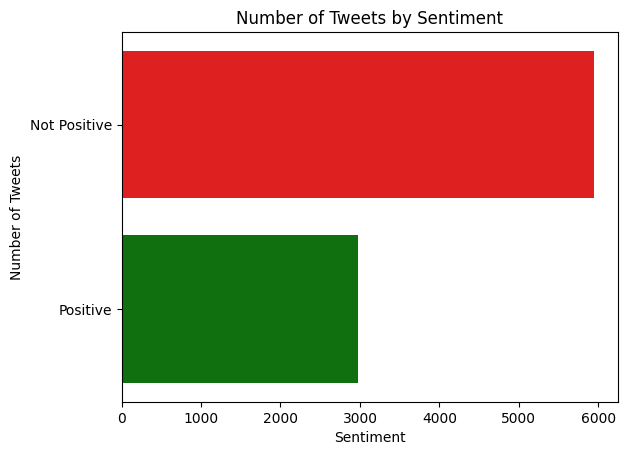

In [21]:
#Bar Graph of Sentiment Counts
sent_count = sns.countplot(data = df, y = 'Sentiment', palette=['red',"green"])
sent_count.set(ylabel = 'Number of Tweets')
sent_count.set(xlabel = 'Sentiment')
sent_count.set(title = 'Number of Tweets by Sentiment')

There is cleary a strong imbalance in the sentiments of this dataset with "not positive" tweets having about twice as many instances as positive tweets.

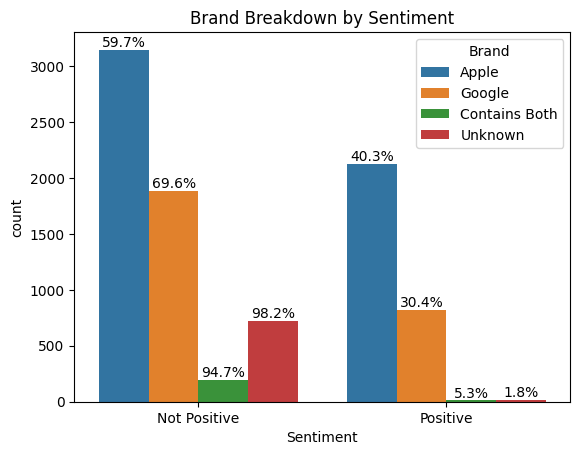

In [22]:
#Bar Graph of brand distribution by sentiment

vc = df.Brand.value_counts()
#Creating plot 
brands_by_sent = sns.countplot(data=df, x='Sentiment', hue='Brand')
brands_by_sent.set(title = 'Brand Breakdown by Sentiment')

#Extracting the percent of each brand that is in each bar and labeling bar chart
for c in brands_by_sent.containers:
    label = c.get_label()
    total = vc[label]
    brands_by_sent.bar_label(c, fmt=lambda v: f'{(v/total)*100:0.1f}%')

This Graph shows the breakdown of sentiment by brand with the percentage of the distribution of each brand located at the top of the bars. We can see that each brand is skewed towards not positive tweets not just in count but in overall percentage of tweets which makes sense as there are about twice as many not positive tweets in the dataset

## Item Distribution

[Text(0.5, 1.0, 'Number of Tweets per Item')]

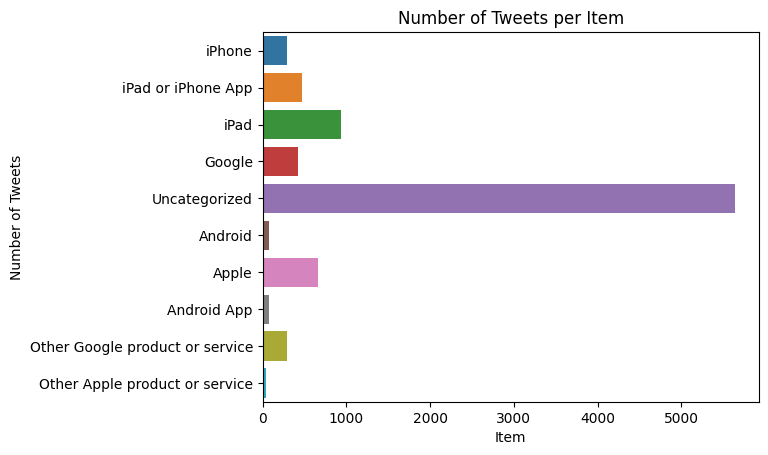

In [23]:
# Item Count Bar Graph
item_count = sns.countplot(data = df, y = 'Item')
item_count.set(ylabel = 'Number of Tweets')
item_count.set(xlabel = 'Item')
item_count.set(title = 'Number of Tweets per Item')

The vast majority of tweets were about an uncategorized brand/product with the iPad having the most tweets about it.

[Text(0.5, 1.0, 'Sentiments by Item')]

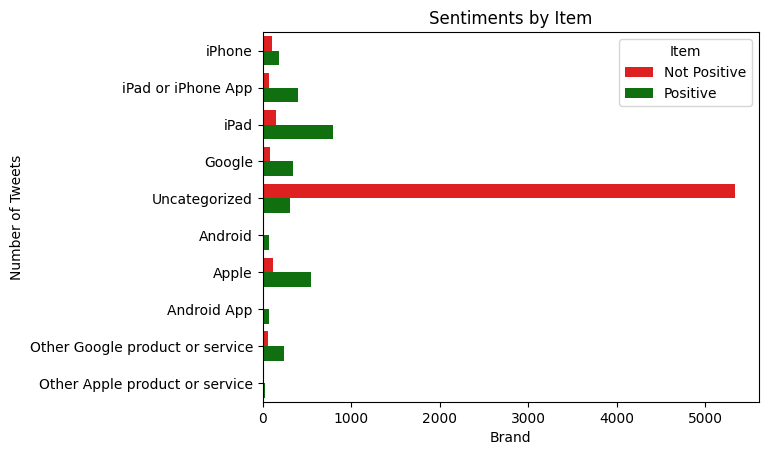

In [24]:
#Sentiment by Item Bar Graph

sent_item_bar = sns.countplot(data=df, y='Item', hue='Sentiment', palette=['red',"green"])
sent_item_bar.legend(title = 'Item', loc = 'upper right')
sent_item_bar.set(ylabel = 'Number of Tweets')
sent_item_bar.set(xlabel = 'Brand')
sent_item_bar.set(title = 'Sentiments by Item')

It seems from this chart that the majority of product/brand directed tweets were positive, as it can be seen that all items except the uncategorized have many more positive tweets than negative.

### Brand Distribution


[Text(0.5, 1.0, 'Number of Tweets by Brand')]

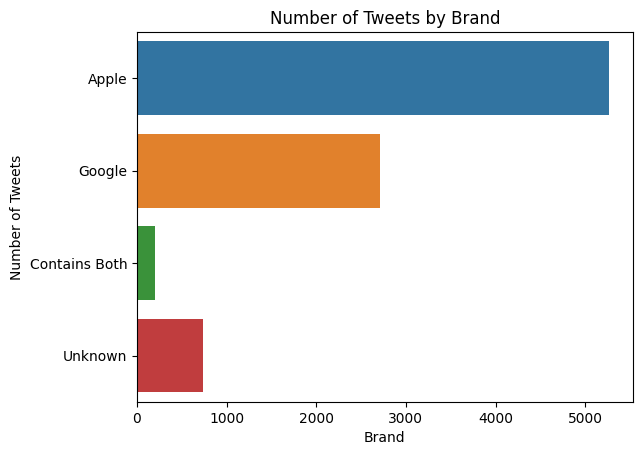

In [25]:
#Brand Tweet Count Bar Graph

brand_count = sns.countplot(data = df, y = 'Brand')
brand_count.set(ylabel = 'Number of Tweets')
brand_count.set(xlabel = 'Brand')
brand_count.set(title = 'Number of Tweets by Brand')

[Text(0.5, 1.0, 'Sentiments by Brand')]

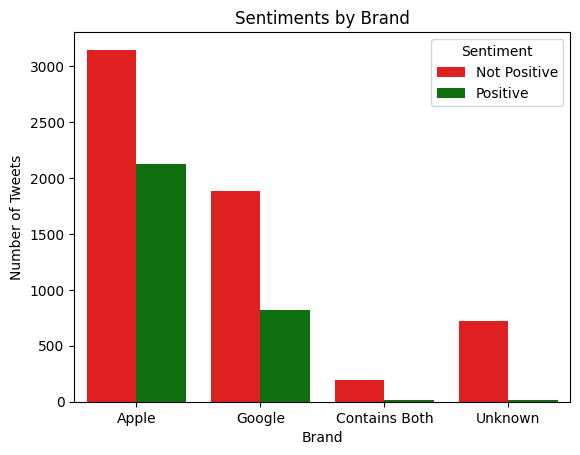

In [26]:
#Sentiment by Brand bar
sent_brand_bar = sns.countplot(data=df, x='Brand', hue='Sentiment', palette=['red',"green"])
sent_brand_bar.legend(title = 'Sentiment', loc = 'upper right')
sent_brand_bar.set(ylabel = 'Number of Tweets')
sent_brand_bar.set(xlabel = 'Brand')
sent_brand_bar.set(title = 'Sentiments by Brand')

It seems that although tweets about specific products or brands scewed in the positive direction, overall the majority of the tweets about the brands as a whole were mostly Not Positive, it is important to remember than "not positive' includes neutral feelings.

## Tweet Length/ Token Count by Sentiment

The tweets were then examined for the length of the tweet, since there are currently two forms of the tweet, the orginal and the cleaned, lemmatized token version, both will be examined

Text(0, 0.5, 'Number of Words')

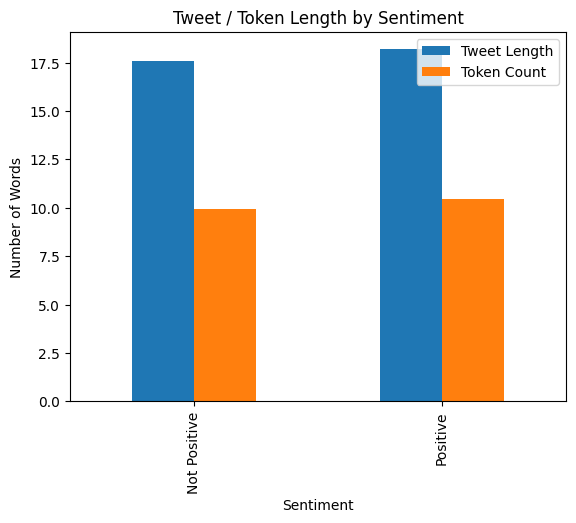

In [27]:
#Tweet/ Token Count by Sentiment bar
tweet_token_sent_bar = df.groupby(['Sentiment'])[['Tweet Length','Token Count']].mean().plot.bar()
tweet_token_sent_bar.set_title('Tweet / Token Length by Sentiment')
tweet_token_sent_bar.set_ylabel('Number of Words')



No obvious trends jump out beyond that there are on average less tokens than words in the origina tweet which is expected as the tweets were editted during their tokenization process.

Text(0, 0.5, 'Number of Words')

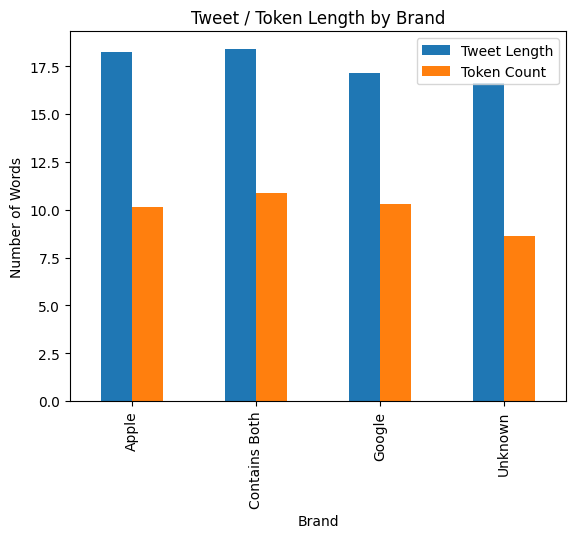

In [28]:
#Tweet/ Token Count by brand bar
tweet_token_brand_bar = df.groupby(['Brand'])[['Tweet Length','Token Count']].mean().plot.bar()
tweet_token_brand_bar.set_title('Tweet / Token Length by Brand')
tweet_token_brand_bar.set_ylabel('Number of Words')



Again no obvious useful trends jump out of this analysis.

## Hashtag Exploration
A common feature of Tweets are "Hashtags" which people often use to tag their post as applying to a certain community of posts. More info on hashtags can be found [here](https://help.twitter.com/en/using-twitter/how-to-use-hashtags#:~:text=A%20hashtag%E2%80%94written%20with%20a,to%20categorize%20Tweets%20by%20keyword).

The next analysis will examine these tags.

Prior to working with the hashtags, the first step will be to tokenize the list of hashtags scraped from each tweet.

In [29]:
#Creating a list of Hashtags from the hashtag column
hashtags_list = df['Hashtag'].to_list()

#Converting list to bag of words separating via commas
hashtag_bag = ','.join(map(str, hashtags_list))
#Converting Bag of words into tokens
hashtag_tokens = word_tokenize(hashtag_bag)
#Reformatting tokens in lowercase
hashtag_tokens = [x.lower() for x in hashtag_tokens]
hashtag_tokens[:10]

['[', "'", '#', 'rise_austin', "'", ',', "'", '#', 'sxsw', "'"]

Now that the hashtags are tokenized there are some punctuations that will need to be removed to clean up this list.

Then the counts of each token will then be extracted via a frequency distribution.

In [30]:
#Defining punctuation as stopwords
hashtag_stopwords = list(string.punctuation)
#Removing punctuation from list of hashtag tokens
hashtag_tokens_clean = [token for token in hashtag_tokens if token not in hashtag_stopwords]

hashtag_freq = nltk.FreqDist(hashtag_tokens_clean)
hashtag_freq.most_common(10)

[('sxsw', 8935),
 ('apple', 413),
 ('google', 318),
 ('sxswi', 313),
 ('ipad2', 294),
 ('iphone', 262),
 ('ipad', 260),
 ('android', 130),
 ('austin', 110),
 ('circles', 97)]

There now exists a frequency distibution of hashtags throughout the dataset. A function will now be built out to create frequency distribution for each sentiment label, the top values of these  distributions will then be graphed and visualized via wordclouds in order to look for differences in hashtag use among different sentiments.

## Exploring Hashtags by Sentiment

In [31]:
def hashtag_wordcloud_bar(df, Sentiment):
    '''
    Input a DataFrame with a "Senitment" string column and a 'Hashtag' string column as well as a string 
    that is the sentiment label you would like to examine. The fuction creates a list of all of the words in 
    the Hashtag column by the sentiment choosen, the list is then made into a bag of words and tokenized. Tokens are
    then formatted as lowercase and punctation. 
    
    A frequency distribution of the tokens is then created and the top 15 words printed out, the top 40 tokens
    are visualized as a wordcloud and the top 8 tokens via a bar graph. 
    '''
    hashtag_df = df[df['Sentiment'] == Sentiment]

    #Creating a list of Hashtags from the hashtag column
    hashtag_list = hashtag_df['Hashtag'].to_list()
    #Converting list to bag of words separating via commas
    hashtag_bag = ','.join(map(str, hashtag_list))
    #Converting Bag of words into tokens
    hashtag_tokens = word_tokenize(hashtag_bag)
    #Reformatting tokens in lowercase
    hashtag_tokens = [x.lower() for x in hashtag_tokens]
    #Defining punctuation as stopwords
    hashtag_stopwords = list(string.punctuation)
    #removing punctuation from list of hashtag tokens
    hashtag_tokens_clean = [token for token in hashtag_tokens if token not in hashtag_stopwords]
    
    #Create Frequency Distribution
    hashtag_freq = nltk.FreqDist(hashtag_tokens_clean)

    #Printing top 15 tokens
    print('Top Ten Hashtags for', Sentiment, 'are:', hashtag_freq.most_common(15))
    
    
    #Conversion to pandas series for plotting
    hashtag_freq_series = pd.Series(dict(hashtag_freq.most_common(8)))
    fig, ax = plt.subplots(figsize=(6,4))
    sns.barplot(x=hashtag_freq_series.index, y=hashtag_freq_series.values, ax=ax)
    plt.gca().set(title='Top 8 most Common Hashtags for {} Tweets'.format(Sentiment), ylabel='Hashtag Count')
    plt.xticks(rotation=30);
    
    #Building Wordcloud
    wordcloud = WordCloud(max_words = 40, collocations = False, 
                       background_color = 'black', colormap = 'prism') #Make wordcloud
    wordcloud.generate(",".join((hashtag_tokens_clean))) #Generates wordcloud from input list

    plt.figure(figsize = (8, 6), facecolor = None) #Set figure size
    plt.imshow(wordcloud) #Shows wordcloud
    plt.axis('off') #Sets axis
    plt.title('Word Cloud of {} Hashtags'.format(Sentiment)); #Set title of plot


Top Ten Hashtags for Positive are: [('sxsw', 2984), ('apple', 177), ('ipad2', 130), ('sxswi', 96), ('ipad', 93), ('iphone', 82), ('google', 69), ('android', 42), ('austin', 40), ('tech', 28), ('hollergram', 23), ('ubersocial', 21), ('tapworthy', 21), ('winning', 19), ('circles', 17)]


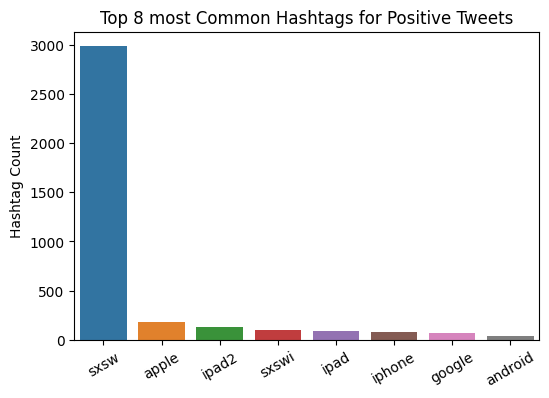

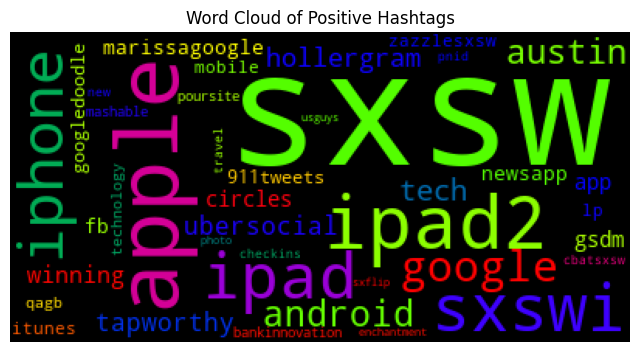

In [32]:
#Positive Sentiment Hashtags Analysis
hashtag_wordcloud_bar(df, 'Positive')

Top Ten Hashtags for Not Positive are: [('sxsw', 5951), ('google', 249), ('apple', 236), ('sxswi', 217), ('iphone', 180), ('ipad', 167), ('ipad2', 164), ('android', 88), ('circles', 80), ('austin', 70), ('tech', 59), ('japan', 51), ('ubersocial', 47), ('gsdm', 47), ('infektd', 46)]


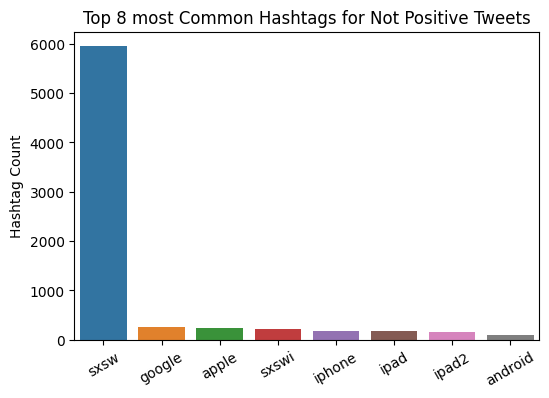

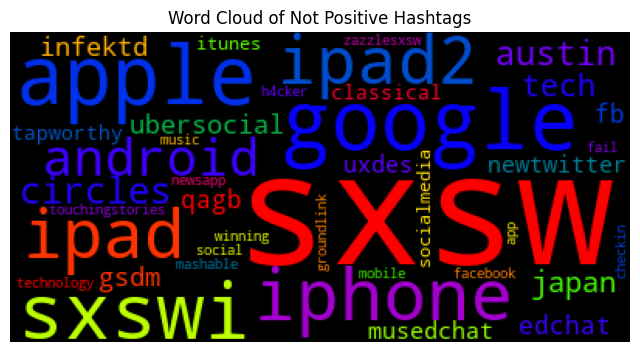

In [33]:
#Not Positive Sentiment Hashtags Analysis

hashtag_wordcloud_bar(df, 'Not Positive')

It seems that the Hashtag rates are very similar across sentiments and upon early inspection it seems unlikely that hashtags will not be a very helpful feature when classifing these tweets by sentiment. It is likely that better results could be gained by adding many of the shared hashtags to the list of stopwords and removing them from the token lists, but instead another route will be taken by looking at the phrases or N-Grams by sentiment. 

## Examing the most common Phrases using Ngrams

Next a bit of the context associated with the tweets will be examined via N-Grams. N-Grams of multple lengths will be examined across sentiment labels to look for differences and similarities. A helper function will be built out to visualize the top N-Grams of a specified N-Gram length in order to simplify this process.

Before this function can be built out a dictionary containing a list of tokens assoicated with each sentiment as well as the overall dataset will be created.


In [34]:
# Creating a list of tweet tokens by Sentiment 

#Listing Sentiment Values
Sentiments = ['Positive', 'Not Positive']

#Creating Empty Lists to extend to 
dfs_list = {}
tokens_list = {}

#Looping through each Sentiment to create a token list exclusive to that sentiment
for sentiment in Sentiments:
    dfs_list['df_{}'.format(sentiment)] = \
        df['Processed_Tweet'].loc[df['Sentiment'] ==  sentiment]
    tokens_list['tokens_{}'.format(sentiment)] = []
    for words in dfs_list['df_{}'.format(sentiment)]:
        tokens_list['tokens_{}'.format(sentiment)].extend(words)
        
#Creating a list that contains all tweet tokens with the entire dataset as well
all_tokens = []
for words in df['Processed_Tweet']:
    all_tokens.extend(words)   
tokens_list['All_Tokens'] = all_tokens

#Displaying Token List Names inside dictionary
tokens_list.keys()

dict_keys(['tokens_Positive', 'tokens_Not Positive', 'All_Tokens'])

In [35]:
#Inspecting number of tokens per sentiment list

print('Number of Positive Tokens:', len(tokens_list['tokens_Positive']))
print('Number of Not Tokens:', len(tokens_list['tokens_Not Positive']))
print('Number of All Tokens:', len(tokens_list['All_Tokens']))

Number of Positive Tokens: 30977
Number of Not Tokens: 58930
Number of All Tokens: 89907


In [36]:
#Creating Frequency Distributions for each token list

all_tokens_count = nltk.FreqDist(tokens_list['All_Tokens'])
pos_tokens_count = nltk.FreqDist(tokens_list['tokens_Positive'])   
not_pos_tokens_count = nltk.FreqDist(tokens_list['tokens_Not Positive'])   


Now that there is a list of tokens as well as frequency distributions of those tokens by sentiment, a helper function will be built out in order to create n-grams of a specified length for each token list and then a visualization of the top n-grams for each sentiment will be created 


In [37]:
def top_ngrams_bars(x, dic_of_token_lists):
    '''
    This Function takes in an designated ngram size number (x) and a dictionary of lists of tokenized words, up to 4 lists. The lists
    The lists of tokens should be strings delimited with commas.
    The function will then create bar charts of the top 8 most common ngrams of the designated ngram size for each list of tokens.
    Each bar chart is titled with the list title 
    '''
    list_names = list(dic_of_token_lists.keys()) #Extracting token list names  
    color_palettes = ['Greens_r', 'Reds_r', 'Blues_r', 'Greys_r'] #Creating list of color palettes 
    
    for list_num in range(len(list_names)):
        ngrams = (pd.Series(nltk.ngrams(dic_of_token_lists[list_names[list_num]], x)).value_counts())[:8] #Taking top 8 most common ngrams of x size
        ngrams_df = pd.DataFrame(ngrams)
        ngrams_df = ngrams_df.reset_index() #Resetting index as it defaults to the ngrams
        ngrams_df = ngrams_df.rename(columns = {'index': 'ngram', 0: 'Count'}) #Renaming df columns for readability 
        
        #Building bar graph of top ngrams
        fig = plt.figure(figsize = (8, 2))
        sns.barplot(data=ngrams_df, x = 'count', y = 'ngram', palette = color_palettes[list_num]).set(title = '{} Top Ngrams'.format(list_names[list_num]))
        plt.xlabel("Number of Occurances")
        plt.ylabel("N-Gram")
        plt.tight_layout()
        
    return plt.show()
       

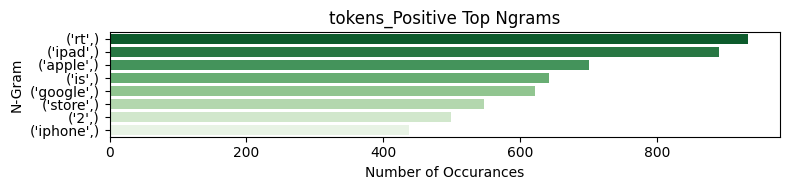

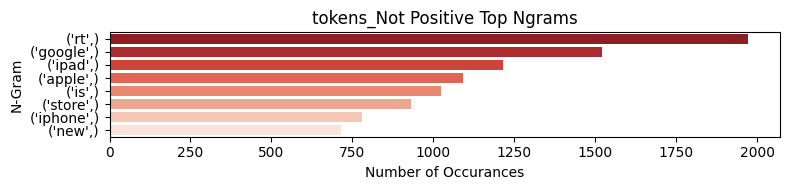

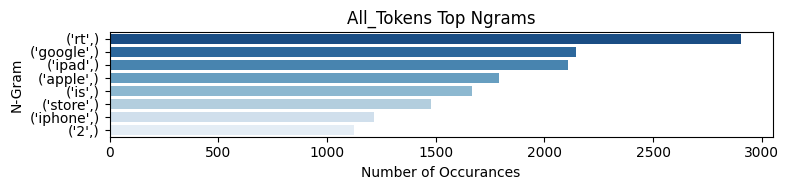

In [38]:
#Top Ngrams of size 1 by sentiment 
top_ngrams_bars(1, tokens_list)

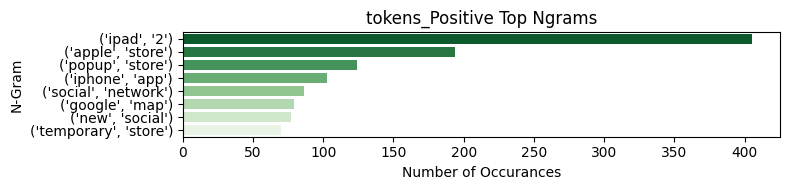

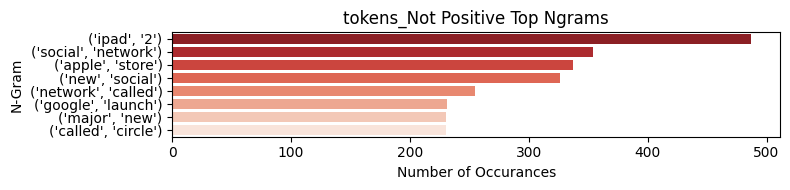

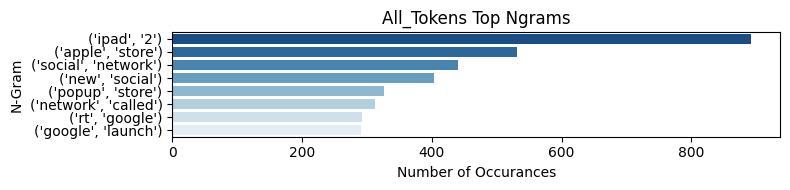

In [39]:
#Top Ngrams of size 2 by sentiment 
top_ngrams_bars(2, tokens_list)

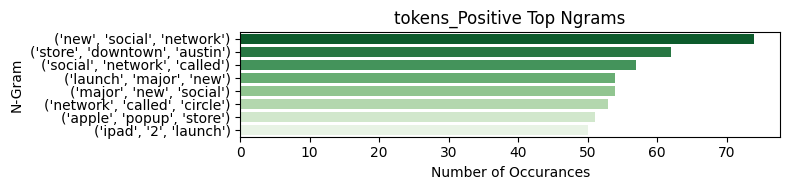

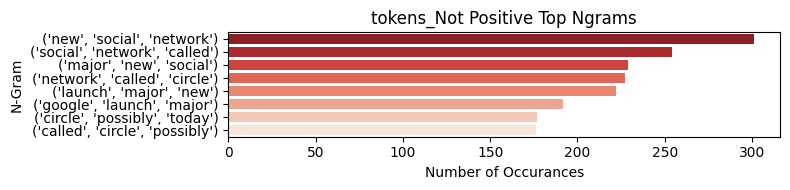

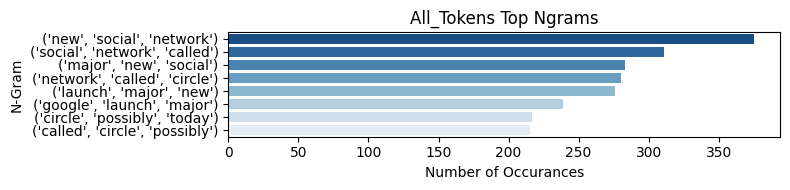

In [40]:
#Top Ngrams of size 3 by sentiment 
top_ngrams_bars(3, tokens_list)

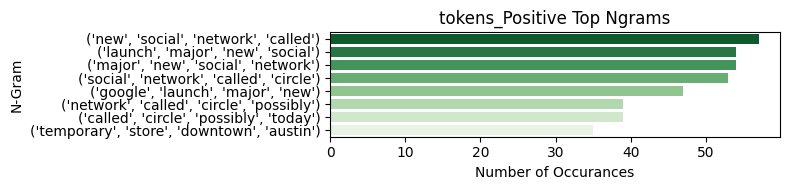

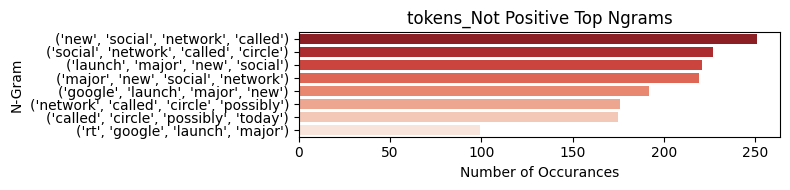

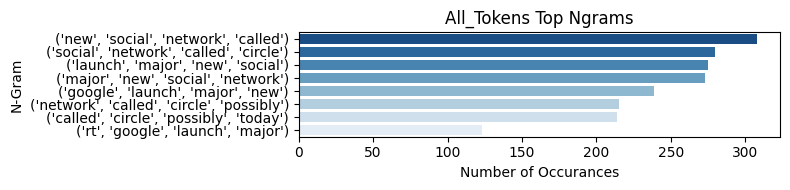

In [41]:
#Top Ngrams of size 4 by sentiment 
top_ngrams_bars(4, tokens_list)

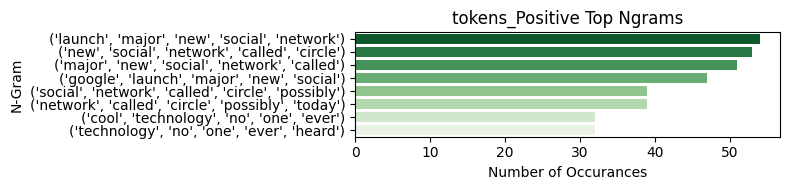

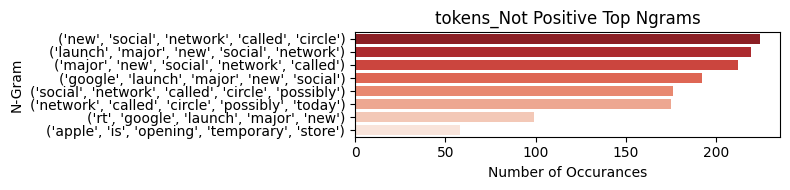

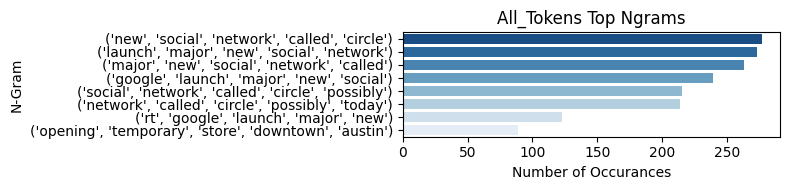

In [42]:
#Top Ngrams of size 5 by sentiment 
top_ngrams_bars(5, tokens_list)

Much like what was seen with the Hashtags, it seems that the n-grams remain very similar across sentiments, even at an n-gram size of 5. This leads me to believe that this will not be the most helpful in categorizing tweet sentiment. Again it is possible that by removing a number of common words the variation among sentiment n-grams may become greater and therefore be of more use, but this feels like sufficient for the current data understanding.

# Modeling 

Through an exploratory data analysis it does not seem that the engineered features will provide much help with the classification model, therefore aNatural Language Processing Convolutional neural network will be built out using the tokenized/lemmanized tweet tokens.

This model will be trained to predict if a tweet has a "Positive" or "Not Positive" sentiment based on the tweet text alone.


## Final Data Prep prior to modeling

Before modeling begins a simplified DataFrame will be built out with only the features that will be relevant to the modeling, from there the entire dataset will then be split into three distinct groups at a ratio of 8:1:1 for model training, validation and testing. Then the tokens in each group will be converted into a list of padded arrays for input into the model. 

In [43]:
#Creating new df with only NLP modeling relevant columns
df_model = df[['Sentiment','Processed_Tweet', 'Token Count']]
df_model.head()

,Sentiment,Processed_Tweet,Token Count
0,Not Positive,"[have, 3g, iphone, 3, hr, tweeting, it, wa, de...",13
1,Positive,"[know, awesome, ipadiphone, app, likely, appre...",12
2,Positive,"[can, not, wait, 2, also, should, sale]",7
3,Not Positive,"[hope, year, festival, isnt, crashy, year, iph...",8
4,Positive,"[great, stuff, fri, marissa, mayer, google, ti...",14


In [44]:
#Creating set of all unique tokens and extracting list length

#Creating set of all unique words to figure out lexicon length 
total_lexicon = set(word for words in df_model['Processed_Tweet'] for word in words)
lexicon_length = len(total_lexicon)
print('Total number of Unique Lemmanized Tokens is',lexicon_length)


Total number of Unique Lemmanized Tokens is 8870


In order to assure that all tweets are correctly padded to the same length, the longest tweet must be extracted to use as the padding basis.


In [58]:
#Extracting longest token length in lexicon to use as padding basis
max_length = df_model['Token Count'].max()
max_length = 24



In [46]:
#Creating Label id column that is 1s and 0s
df_model['label_id'] = df_model['Sentiment'].factorize()[0]

/var/folders/sq/8smv466d46zg1m9_7m_qhdk40000gn/T/ipykernel_53889/992572015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['label_id'] = df_model['Sentiment'].factorize()[0]


In [47]:
#Verifying that label_id column is present
df_model.head()

,Sentiment,Processed_Tweet,Token Count,label_id
0,Not Positive,"[have, 3g, iphone, 3, hr, tweeting, it, wa, de...",13,0
1,Positive,"[know, awesome, ipadiphone, app, likely, appre...",12,1
2,Positive,"[can, not, wait, 2, also, should, sale]",7,1
3,Not Positive,"[hope, year, festival, isnt, crashy, year, iph...",8,0
4,Positive,"[great, stuff, fri, marissa, mayer, google, ti...",14,1


In [60]:
#Labeling X and y for train_test_split
X = df_model['Processed_Tweet'].values
y = df_model['label_id'].values

print(X.shape)
print(y.shape)

(8914,)
(8914,)


## Train-Test-Validation Splits

Prior to modeling the dataset will be split into a training, testing and validation set with a ratio of [8:1:1], this will allow the model to be properly trained and then tested with novel data.

In [61]:
#Splitting data into training data and remaining data, to be split again into test and validation
X_train, X_rem, y_train, y_rem, = train_test_split(X, y, test_size = 0.20, random_state=42)

#Splitting remaining 20% of data evenly between test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)

(7131,)
(7131,)
(891,)
(891,)
(892,)
(892,)


(None, None)

The three distinct groups now need to be converted into padded arrays for the model.

In [62]:
#Setting Parameters for tokenization and padding
vocab_size = lexicon_length
max_length = max_length
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

#Instantiating Tokenizer and fitting to X_train
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

#Creating padded verions of X_train, X_test and X_val
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, padding=padding_type,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(X_val)
val_padded = pad_sequences(val_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)



In [63]:
#Turning model inputs into Arrays and Renaming them for ease of use

X_train = np.array(training_padded)
y_train = np.array(y_train)
X_test = np.array(testing_padded)
y_test = np.array(y_test)
X_val = np.array(val_padded)
y_val = np.array(y_val)

In [64]:
#Setting Sentiment labels to categorial 
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)
y_val = to_categorical(y_val, num_classes = 2)


In [65]:
#Previewing Data that will go into model
print(y_train)
X_train

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


array([[ 245,    3,   39, ...,    0,    0,    0],
       [ 414, 4238,    3, ...,    0,    0,    0],
       [2848, 1385,   43, ...,    0,    0,    0],
       ...,
       [   2,   69,   51, ...,    0,    0,    0],
       [8051,  485,  182, ...,    0,    0,    0],
       [  18,    5,    7, ...,    0,    0,    0]], dtype=int32)

Now all 3 sets of data have been converted into padded arrays, a train, test and validation set splitting the data into a [8:1:1] ratio. The next step will be building helper functions for model evaluation and then setting up the Baseline CNN NLP model and inputting the data.

## Helper Functions for Model Evaluation

Before beginning the modeling stage, a number of helper fuctions will be built out in order to allow for quick and easy model evaluation. These functions will create plots of the training vs validation results in overall loss and accuracy of the models, as well as use the test data set to evaluate the performance on a novel group of tweets and build out confusion matrices and classification reports.

In [54]:
#Function For Model Performance Visualiztion of accuracy or loss vs epoch

def visualize_model_performance(results):
    '''
    Input is the results after fitting a CNN Sequential model and the output are two graphs, one plots the loss by epoch
    for the training and validation datasets and the second plots a similar graph for accuracy rather than loss.
    '''
    history = results.history
    
    #final_epoch_stats(results)
    
    plt.figure(figsize=(10,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Graph of Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(10,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Graph of Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()



def make_confusion_and_classification(model, model_name):
    '''
    The Inputs for this fuction are a model prior to being fit and a string that will act as the title of the
    visualization. The output creates a heatmapped confusion matrix as well as a classification report for the model.
    The testing set (X_test, y_test) is used for these visualizations, so that the metrics are based on data that is
    novel to the model.
    '''
    
    #Show model.evaluate results 
    eval_metrics = model.evaluate(X_train, y_train, verbose=0)
    print('The Accuracy for the training group was', eval_metrics[1]*100)
    print('The Loss for the training group was', eval_metrics[0])
    print('--------------------------------------')
    eval_metrics = model.evaluate(X_test, y_test, verbose=0)
    print('The Accuracy for the test group was', eval_metrics[1]*100)
    print('The Loss for the test group was', eval_metrics[0])
    
    #Make Predictions for model
    preds = model.predict(X_test)
    #Converting label predictions with argmax to show sentiment label
    preds = np.argmax(preds, axis=1)
    #Converting actual labels with argmax to match predictions
    y_test_arg=np.argmax(y_test, axis=1)
    #Create confusion matrix
    conmat = tf.math.confusion_matrix(y_test_arg, preds)
    
    #Create dataframe from confusion matrix
    val = np.mat(conmat)
    #classnames = list(set(y_train))
    df_cm = pd.DataFrame(val)
    
    #generate heatmap confusion matrix
    plt.figure()
    heatmap = sns.heatmap(df_cm, annot=True, cmap='Reds',fmt='g')
    heatmap.yaxis.set_ticklabels(['Not Positive', 'Positive'], rotation=0)
    heatmap.xaxis.set_ticklabels(['Not Positive', 'Positive'], rotation=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(model_name)
    plt.show()
    
    #generate classification report
    print(classification_report(y_test_arg ,preds))

def final_epoch_stats(results):
    '''
    Input is the results of a CNN model after being fit. Prints out the accuracy and loss statistics for the 
    training and validation sets for the final epoch of the model.
    '''
    history = results.history
    
    #Printing Final Epoch Stats
    print('Final Epoch Stats:')
    print('Training Loss:', history['loss'][-1:])
    print('Training Accuracy:', history['accuracy'][-1:])
    print('------------------------')
    print('Validation Loss:', history['val_loss'][-1:])
    print('Validation Accuracy:', history['val_accuracy'][-1:])
    

## Baseline Model

Modeling will start off with a fairly basic CNN sequential model that contains 3 dense layers and will be compiled for accuracy and uses binary crossentropy as the loss metric via the "adam' optimizer. From there the model will be iterated on in the hope of improving the overall classification results.

In [154]:
baseline_model = Sequential()

baseline_model.add(layers.Dense(128, activation='relu', input_shape=(24,)))
baseline_model.add(layers.Dense(64, activation='relu'))
baseline_model.add(layers.Dense(2, activation='sigmoid'))

baseline_model.compile(optimizer='adam',metrics=['accuracy'], loss='binary_crossentropy')
baseline_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 128)               3200      
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 2)                 130       
                                                                 
Total params: 11586 (45.26 KB)
Trainable params: 11586 (45.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [155]:
baseline_results = baseline_model.fit(X_train, y_train, epochs=100, batch_size=50,
                                  validation_data=(X_val, y_val), verbose = 1)

Epoch 1/100
143/143 [==============================] - 0s 889us/step - loss: 30.3394 - accuracy: 0.5765 - val_loss: 13.1192 - val_accuracy: 0.5600
Epoch 2/100
143/143 [==============================] - 0s 584us/step - loss: 12.3295 - accuracy: 0.5808 - val_loss: 10.0760 - val_accuracy: 0.5443
Epoch 3/100
143/143 [==============================] - 0s 561us/step - loss: 8.6032 - accuracy: 0.5893 - val_loss: 8.1250 - val_accuracy: 0.5668
Epoch 4/100
143/143 [==============================] - 0s 573us/step - loss: 6.8527 - accuracy: 0.5992 - val_loss: 7.9747 - val_accuracy: 0.5286
Epoch 5/100
143/143 [==============================] - 0s 563us/step - loss: 5.7914 - accuracy: 0.5964 - val_loss: 6.7883 - val_accuracy: 0.6251
Epoch 6/100
143/143 [==============================] - 0s 552us/step - loss: 4.7422 - accuracy: 0.6197 - val_loss: 5.2515 - val_accuracy: 0.6016
Epoch 7/100
143/143 [==============================] - 0s 551us/step - loss: 4.0263 - accuracy: 0.6217 - val_loss: 6.2189 - va

The Accuracy for the training group was 75.3190279006958
The Loss for the training group was 0.48595625162124634
--------------------------------------
The Accuracy for the test group was 63.00448179244995
The Loss for the test group was 0.8797311186790466
28/28 [==============================] - 0s 302us/step


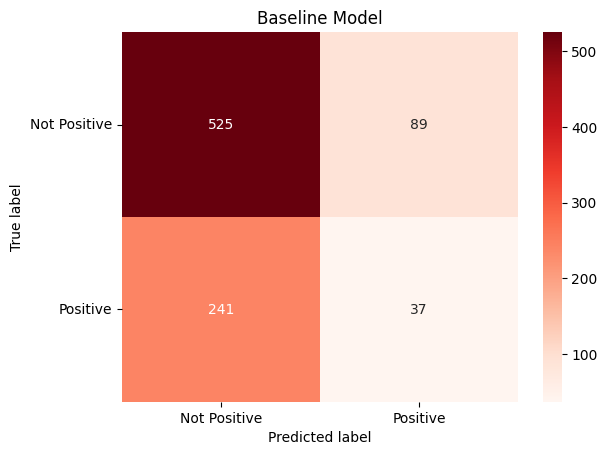

              precision    recall  f1-score   support

           0       0.69      0.86      0.76       614
           1       0.29      0.13      0.18       278

    accuracy                           0.63       892
   macro avg       0.49      0.49      0.47       892
weighted avg       0.56      0.63      0.58       892



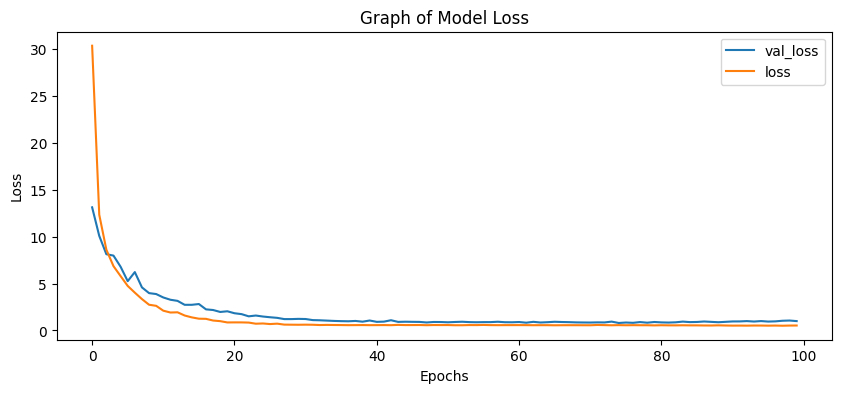

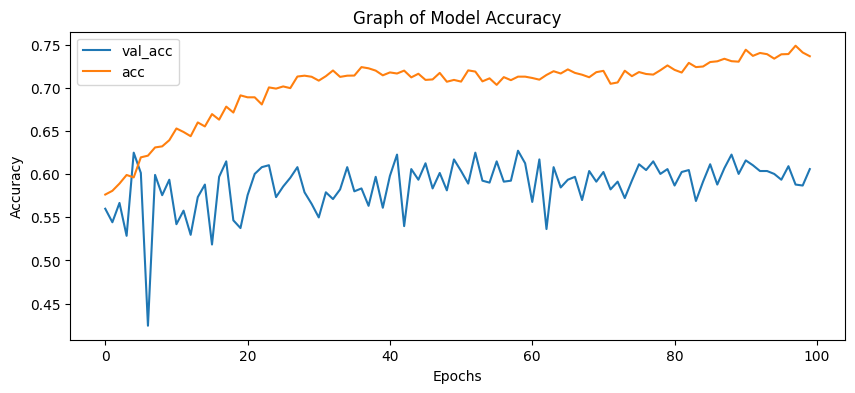

In [156]:
make_confusion_and_classification(baseline_model, 'Baseline Model')
visualize_model_performance(baseline_results)


## Baseline Model Analysis

As can be seen by the above charts, the baseline model did alright with accuracy generally increasing and loss decreasing in both the training and validation set as epochs proceed. This model is currently quite overfit with the training data being signicantly more accurately labeled (\~75%) than the test data (~63%) after training the modeling. There is also an alarming small number of "Positive" predictions being made, this will be monitored moving forward.

In the next iteration of the model, a dropout layer will be added after the first dense layer at a rate of 0.2 in the hope of helping mend the over fitting issue.

An Early stop based on the validation set's accuracy will also be added to assure efficient use of resources.

## Model 2
 
As mentioned above the first iteration on the baseline model will contain a dropout layer in the hope that it helps with the model's overfitting issue. An early stop based on validation accuracy will also be added.

In [56]:
#Introducing Early stop based on val_accuracy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#declare checkpoint variable and early stopping to get best model
early_stop = [EarlyStopping(monitor = 'val_accuracy', patience = 15),
              ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)]

In [158]:
model2 = Sequential()

model2.add(layers.Dense(128, activation='relu', input_shape=(24,)))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(2, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               3200      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 2)                 130       
                                                                 
Total params: 11586 (45.26 KB)
Trainable params: 11586 (45.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [159]:
model2_results = model2.fit(X_train, y_train, epochs=100, batch_size=50,
                    validation_data=(X_val, y_val), verbose = 1,
                   callbacks=early_stop)

Epoch 1/100
143/143 [==============================] - 0s 1ms/step - loss: 39.3413 - accuracy: 0.5835 - val_loss: 14.6549 - val_accuracy: 0.5455
Epoch 2/100
143/143 [==============================] - 0s 626us/step - loss: 17.5436 - accuracy: 0.5908 - val_loss: 7.5329 - val_accuracy: 0.5533
Epoch 3/100
 90/143 [=================>............] - ETA: 0s - loss: 10.5979 - accuracy: 0.6004

/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


143/143 [==============================] - 0s 674us/step - loss: 9.8355 - accuracy: 0.5953 - val_loss: 4.1070 - val_accuracy: 0.5915
Epoch 4/100
143/143 [==============================] - 0s 628us/step - loss: 5.4465 - accuracy: 0.5967 - val_loss: 2.1107 - val_accuracy: 0.6105
Epoch 5/100
143/143 [==============================] - 0s 660us/step - loss: 2.5376 - accuracy: 0.6054 - val_loss: 0.8323 - val_accuracy: 0.6240
Epoch 6/100
143/143 [==============================] - 0s 630us/step - loss: 1.1174 - accuracy: 0.6292 - val_loss: 0.6881 - val_accuracy: 0.6498
Epoch 7/100
143/143 [==============================] - 0s 613us/step - loss: 0.8697 - accuracy: 0.6448 - val_loss: 0.6678 - val_accuracy: 0.6465
Epoch 8/100
143/143 [==============================] - 0s 626us/step - loss: 0.8034 - accuracy: 0.6512 - val_loss: 0.6647 - val_accuracy: 0.6487
Epoch 9/100
143/143 [==============================] - 0s 841us/step - loss: 0.7294 - accuracy: 0.6606 - val_loss: 0.6605 - val_accuracy: 0.64

The Accuracy for the training group was 66.62459969520569
The Loss for the training group was 0.6366662979125977
--------------------------------------
The Accuracy for the test group was 68.83407831192017
The Loss for the test group was 0.6220682859420776
28/28 [==============================] - 0s 311us/step


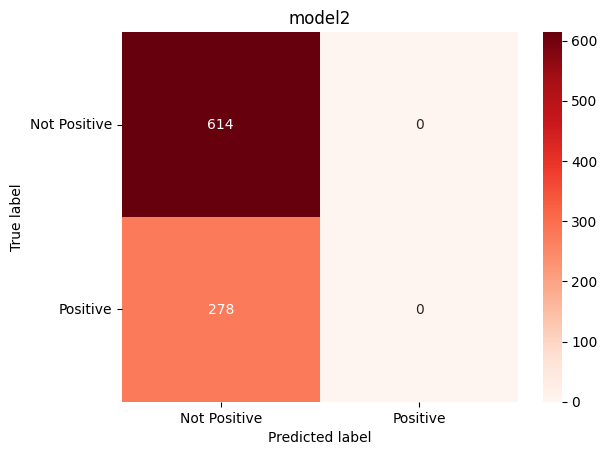

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       614
           1       0.00      0.00      0.00       278

    accuracy                           0.69       892
   macro avg       0.34      0.50      0.41       892
weighted avg       0.47      0.69      0.56       892



/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

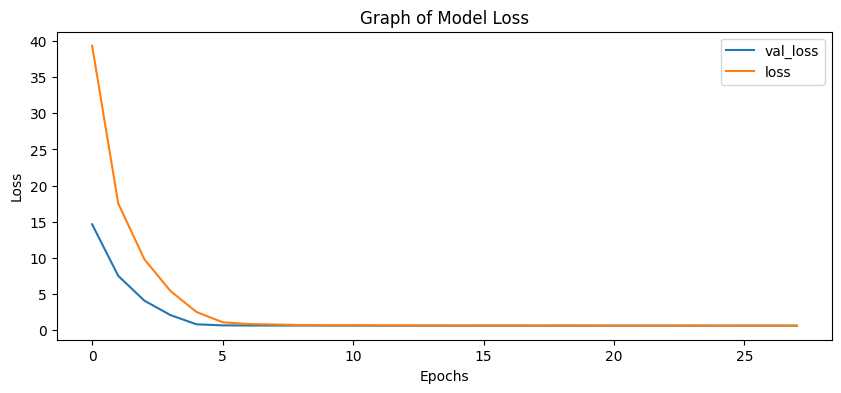

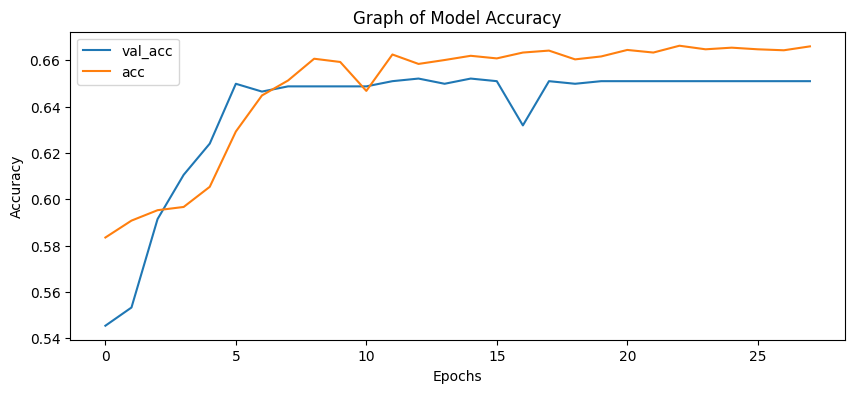

In [160]:
make_confusion_and_classification(model2, 'model2')
visualize_model_performance(model2_results)

### Second Model Analysis 

This second version of the model with the dropout layer inplace is already significantly less overfit than the baseline model with the training and validation metrics being much more similar. The training data had an accuracy of ~66% and the test group had an accuracy slightly higher at ~68%, both of the loss metrics being about 0.62 - 0.63. 

The accuracy on the training model has dipped about 9% but the test set raised about 5%. Even with these stats it can seen via the confusion matrix that in this model zero "Positive" predictions were made, this is a large issue that will need to be dealt with.

An Additonal Dense layer and L2 regularization will be added in hopes of improving the model further.

## Model 3 - L2 Regularization


In [66]:
model3 = Sequential()

model3.add(layers.Dense(128, activation='relu', input_shape=(24,), kernel_regularizer=regularizers.l2(0.02)))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(2, activation='sigmoid'))


optimizer = keras.optimizers.legacy.Adam(learning_rate=0.001)

model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

model3_results = model3.fit(X_train, y_train, epochs=100, batch_size=20,
                    validation_data=(X_val, y_val), verbose = 1,
                   callbacks=early_stop)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               3200      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 16)                1040      
                                                                 
 dense_15 (Dense)            (None, 2)                 34        
                                                                 
Total params: 12530 (48.95 KB)
Trainable params: 12530 (48.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
357/35

/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


357/357 [==============================] - 0s 560us/step - loss: 2.8916 - accuracy: 0.6633 - val_loss: 2.8010 - val_accuracy: 0.6566
Epoch 3/100
357/357 [==============================] - 0s 543us/step - loss: 2.7399 - accuracy: 0.6664 - val_loss: 2.6727 - val_accuracy: 0.6566
Epoch 4/100
357/357 [==============================] - 0s 557us/step - loss: 2.6025 - accuracy: 0.6658 - val_loss: 2.5291 - val_accuracy: 0.6566
Epoch 5/100
357/357 [==============================] - 0s 664us/step - loss: 2.4525 - accuracy: 0.6660 - val_loss: 2.3813 - val_accuracy: 0.6566
Epoch 6/100
357/357 [==============================] - 0s 554us/step - loss: 2.3023 - accuracy: 0.6658 - val_loss: 2.2271 - val_accuracy: 0.6566
Epoch 7/100
357/357 [==============================] - 0s 544us/step - loss: 2.1425 - accuracy: 0.6661 - val_loss: 2.0666 - val_accuracy: 0.6566
Epoch 8/100
357/357 [==============================] - 0s 532us/step - loss: 1.9831 - accuracy: 0.6661 - val_loss: 1.9066 - val_accuracy: 0.65

The Accuracy for the training group was 66.61057472229004
The Loss for the training group was 0.8233152627944946
--------------------------------------
The Accuracy for the test group was 68.27354431152344
The Loss for the test group was 0.8117332458496094
28/28 [==============================] - 0s 308us/step


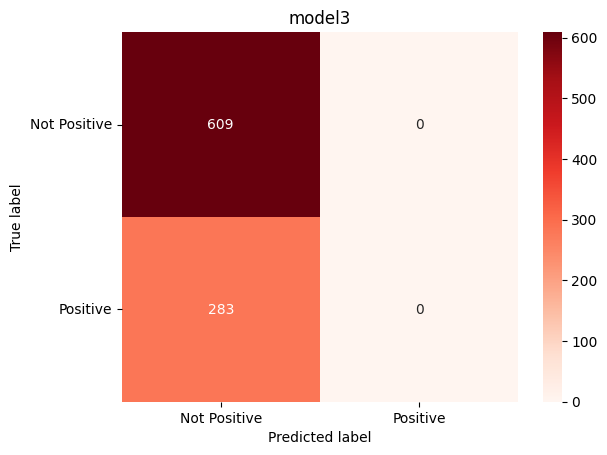

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       609
           1       0.00      0.00      0.00       283

    accuracy                           0.68       892
   macro avg       0.34      0.50      0.41       892
weighted avg       0.47      0.68      0.55       892



/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

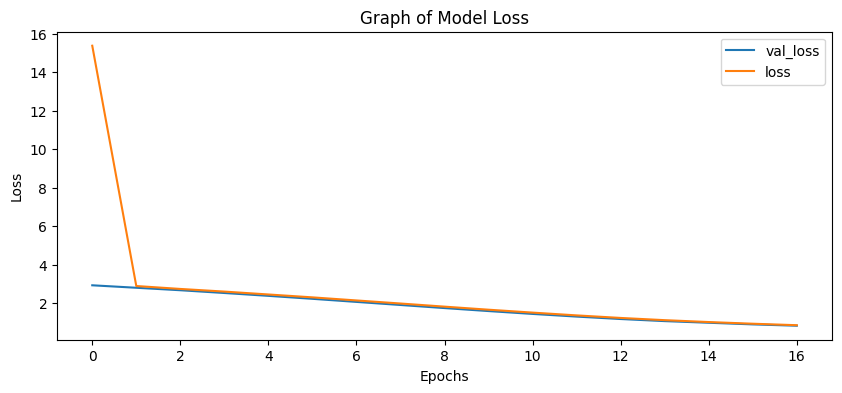

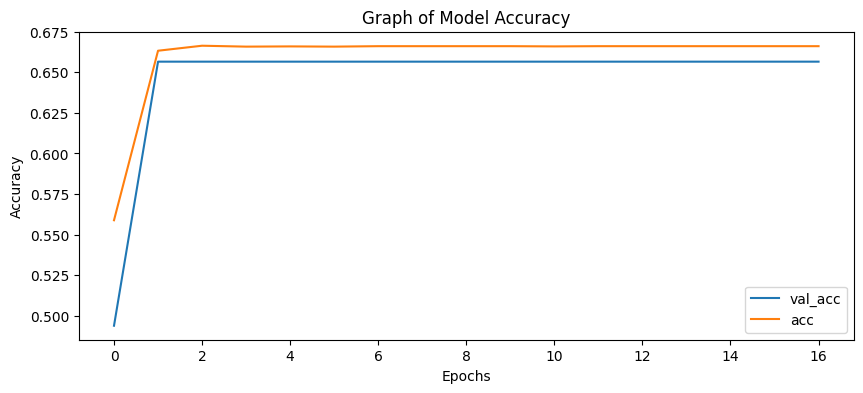

In [67]:
make_confusion_and_classification(model3, 'model3')
visualize_model_performance(model3_results)

## Model 3 Analysis

The third iteration of this model with the addition of l2 regularization in the first two dense nodes did not change the accuracy of the model and increased the loss metric, an overall worse model.

A fourth model will be trained using L1 regularization rather than L2 to see if there is any noticable improvement.

Still no "positive" predictions are being made, if another iteration on this model does not improve this, a new model design will be used.

## Model 4 - L1 Regularization

In [69]:
model4 = Sequential()

model4.add(layers.Dense(128, activation='relu', input_shape=(24,), kernel_regularizer=regularizers.l1(0.01)))
model4.add(layers.Dropout(0.2))
model4.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(2, activation='sigmoid'))


optimizer = keras.optimizers.legacy.Adam(learning_rate=0.001)

model4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model4.summary()

model4_results = model4.fit(X_train, y_train, epochs=100, batch_size=20,
                    validation_data=(X_val, y_val), verbose = 1,
                   callbacks=early_stop)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               3200      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 16)                1040      
                                                                 
 dense_23 (Dense)            (None, 2)                 34        
                                                                 
Total params: 12530 (48.95 KB)
Trainable params: 12530 (48.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
357/35

The Accuracy for the training group was 66.61057472229004
The Loss for the training group was 0.9127269387245178
--------------------------------------
The Accuracy for the test group was 68.27354431152344
The Loss for the test group was 0.9011292457580566
28/28 [==============================] - 0s 340us/step


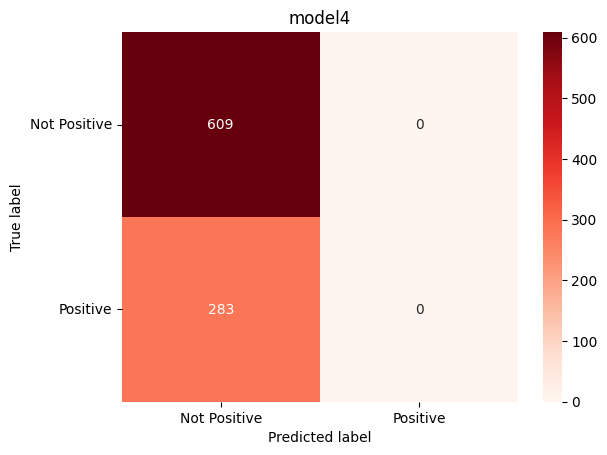

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       609
           1       0.00      0.00      0.00       283

    accuracy                           0.68       892
   macro avg       0.34      0.50      0.41       892
weighted avg       0.47      0.68      0.55       892



/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

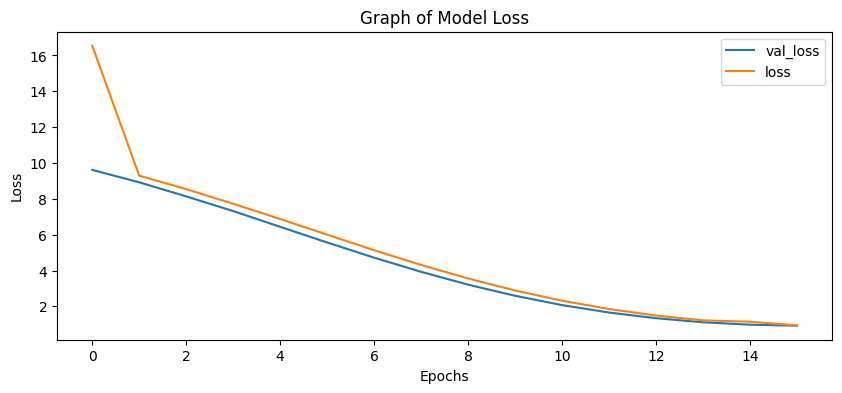

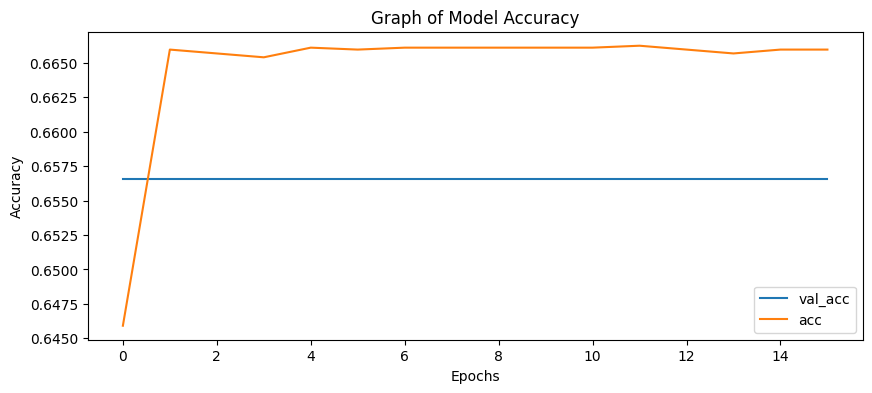

In [70]:
make_confusion_and_classification(model4, 'model4')
visualize_model_performance(model4_results)

## Model 4 Analysis

The fourth iteration of this model which utalized L1 regularization in the first two dense nodes did not improve the accuracy of the model and increased the loss metric significantly when compared to the last two iterations of this model, leaving the model2 as our current best iteration.

This model still did not make any "Positive" predications which continues to be a problem, a new model will be designed and trained using a different thought process, this will be referred to as model_b moving forward.


## Model B - Embedding, LSTM and GlobalMaxPool1D

Model B makes use of Embedding, LSTM and the GlobalMaxPool1D nodes. This was created in an attempt to try a slightly different modeling approach.

In [167]:
model_b = Sequential()

model_b.add(Embedding(input_dim = lexicon_length, output_dim = 128, input_length = 24))
model_b.add(LSTM(128, return_sequences = True))
model_b.add(GlobalMaxPool1D())
model_b.add(Dense(64, activation='relu'))
model_b.add(Dense(16, activation='relu'))
model_b.add(Dense(2, activation='softmax'))


opt = keras.optimizers.legacy.Adam(learning_rate=0.0012)
model_b.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_b.summary()

model_b_results = model_b.fit(X_train, y_train, epochs=100, batch_size=20,
                    validation_data=(X_val, y_val), verbose = 1,
                   callbacks=early_stop)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 24, 128)           1133184   
                                                                 
 lstm_4 (LSTM)               (None, 24, 128)           131584    
                                                                 
 global_max_pooling1d_4 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                                 
 dense_51 (Dense)            (None, 16)                1040      
                                                                 
 dense_52 (Dense)            (None, 2)                 34        
                                                     

/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


357/357 [==============================] - 6s 16ms/step - loss: 0.4416 - accuracy: 0.8000 - val_loss: 0.5558 - val_accuracy: 0.7284
Epoch 3/100
357/357 [==============================] - 6s 16ms/step - loss: 0.3218 - accuracy: 0.8620 - val_loss: 0.7502 - val_accuracy: 0.7194
Epoch 4/100
357/357 [==============================] - 6s 16ms/step - loss: 0.2449 - accuracy: 0.8931 - val_loss: 0.7653 - val_accuracy: 0.7205
Epoch 5/100
357/357 [==============================] - 6s 16ms/step - loss: 0.1918 - accuracy: 0.9159 - val_loss: 0.8976 - val_accuracy: 0.7071
Epoch 6/100
357/357 [==============================] - 6s 16ms/step - loss: 0.1551 - accuracy: 0.9292 - val_loss: 1.0844 - val_accuracy: 0.7250
Epoch 7/100
357/357 [==============================] - 6s 15ms/step - loss: 0.1431 - accuracy: 0.9377 - val_loss: 1.3115 - val_accuracy: 0.6779
Epoch 8/100
357/357 [==============================] - 5s 15ms/step - loss: 0.1265 - accuracy: 0.9436 - val_loss: 1.1555 - val_accuracy: 0.7127
Epoc

The Accuracy for the training group was 98.35927486419678
The Loss for the training group was 0.038850706070661545
--------------------------------------
The Accuracy for the test group was 72.08520174026489
The Loss for the test group was 1.78118097782135
28/28 [==============================] - 0s 4ms/step


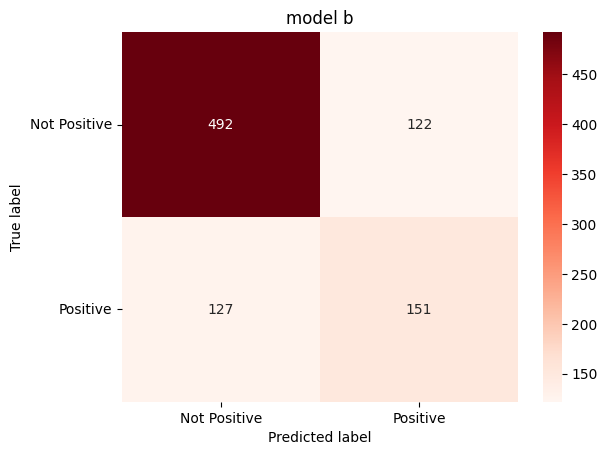

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       614
           1       0.55      0.54      0.55       278

    accuracy                           0.72       892
   macro avg       0.67      0.67      0.67       892
weighted avg       0.72      0.72      0.72       892



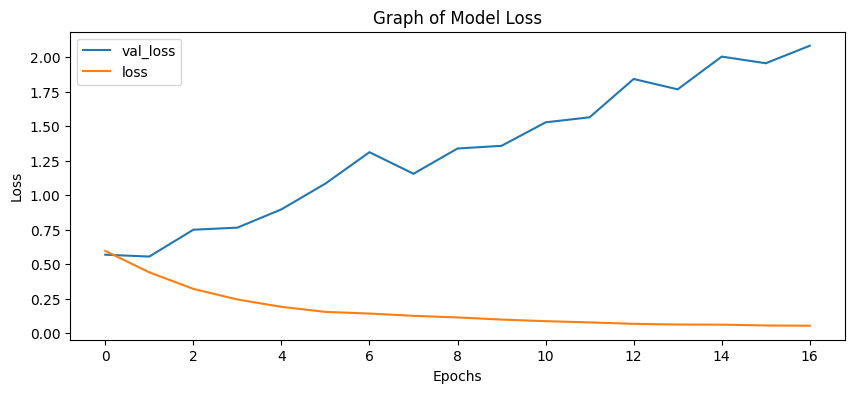

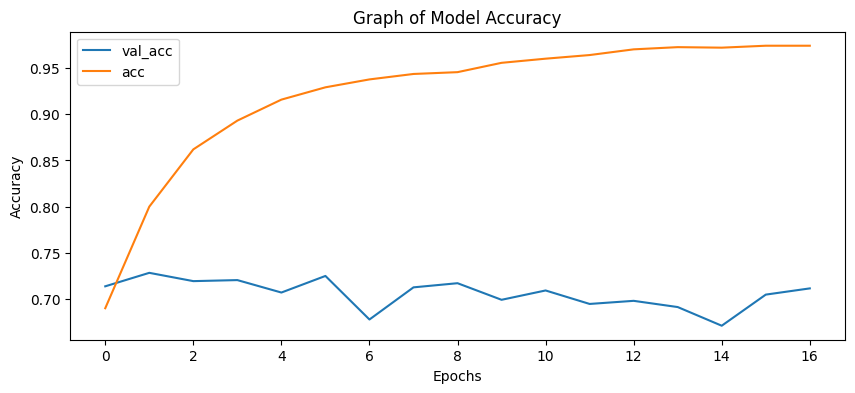

In [168]:
make_confusion_and_classification(model_b, 'model b')
visualize_model_performance(model_b_results) 

## Model B Analysis

Model B in its current state is fairly overfit with the training accuracy at ~98% while testing accuracy is ~72% so like before, a dropout layer will be added in an attempt to mend this overfitting.

It is important to note that this model has higher testing accuracy than all of the previous models and that the model is now making "Positive" predictions which fixes the biggest issue with the last set of models. 


## Model B2 - Adding a Dropout layer


In [170]:
model_b2 = Sequential()

model_b2.add(Embedding(input_dim = lexicon_length, output_dim = 128, input_length = 24))
model_b2.add(LSTM(128, return_sequences = True))
model_b2.add(GlobalMaxPool1D())
model_b2.add(Dense(64, activation='relu'))
model_b2.add(Dropout(0.3))
model_b2.add(Dense(16, activation='relu'))
model_b2.add(Dense(2, activation='softmax'))


opt = keras.optimizers.legacy.Adam(learning_rate=0.0012)
model_b2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_b2.summary()

model_b2_results = model_b2.fit(X_train, y_train, epochs=100, batch_size=20,
                    validation_data=(X_val, y_val), verbose = 1,
                   callbacks=early_stop)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 24, 128)           1133184   
                                                                 
 lstm_6 (LSTM)               (None, 24, 128)           131584    
                                                                 
 global_max_pooling1d_6 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_56 (Dense)            (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_57 (Dense)            (None, 16)                1040      
                                                     

/Users/lucasf/miniconda/envs/learn-env2/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


357/357 [==============================] - 5s 15ms/step - loss: 0.3184 - accuracy: 0.8676 - val_loss: 0.6846 - val_accuracy: 0.7239
Epoch 4/100
357/357 [==============================] - 5s 15ms/step - loss: 0.2415 - accuracy: 0.8981 - val_loss: 0.7783 - val_accuracy: 0.7250
Epoch 5/100
357/357 [==============================] - 5s 15ms/step - loss: 0.1849 - accuracy: 0.9170 - val_loss: 0.7766 - val_accuracy: 0.7149
Epoch 6/100
357/357 [==============================] - 5s 15ms/step - loss: 0.1454 - accuracy: 0.9334 - val_loss: 1.1057 - val_accuracy: 0.7082
Epoch 7/100
357/357 [==============================] - 6s 16ms/step - loss: 0.1345 - accuracy: 0.9352 - val_loss: 1.2298 - val_accuracy: 0.6891
Epoch 8/100
357/357 [==============================] - 5s 15ms/step - loss: 0.1214 - accuracy: 0.9415 - val_loss: 1.1358 - val_accuracy: 0.6936
Epoch 9/100
357/357 [==============================] - 5s 15ms/step - loss: 0.1088 - accuracy: 0.9457 - val_loss: 1.5593 - val_accuracy: 0.6857
Epoc

The Accuracy for the training group was 97.46178388595581
The Loss for the training group was 0.0548216849565506
--------------------------------------
The Accuracy for the test group was 73.87892603874207
The Loss for the test group was 1.8931384086608887
28/28 [==============================] - 1s 5ms/step


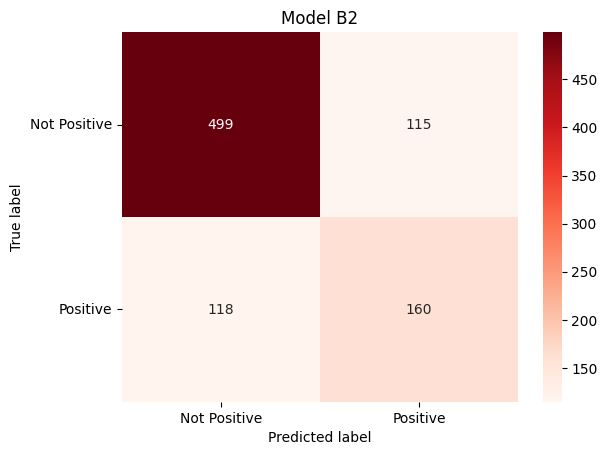

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       614
           1       0.58      0.58      0.58       278

    accuracy                           0.74       892
   macro avg       0.70      0.69      0.69       892
weighted avg       0.74      0.74      0.74       892



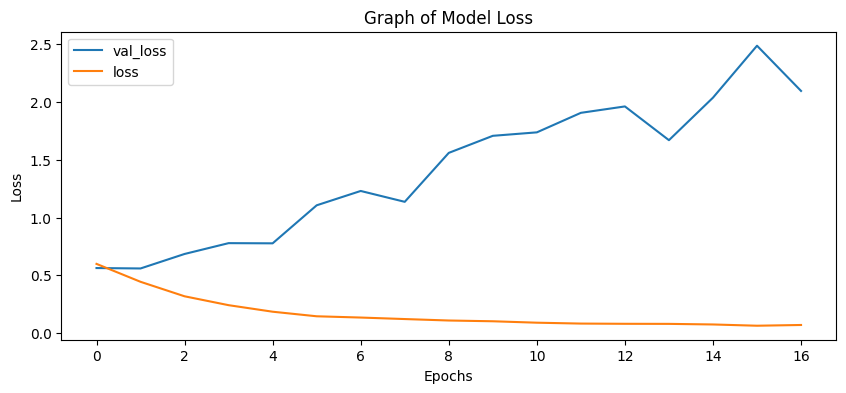

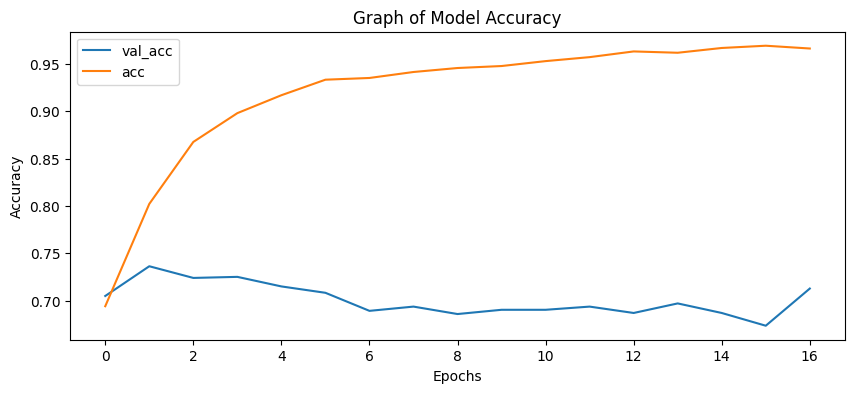

In [171]:
make_confusion_and_classification(model_b2, 'Model B2')
visualize_model_performance(model_b2_results)

## Model B2 Analysis

This model is still fairly overfit with a training accuracy approaching 97% and a validation accuracy closer to 73%. The loss metric also increases for the validation group as epochs persist. L2 regularization as well as an additional dropout layer will be added in an attempt to mend this overfitting issue.


## Model B3 - L2 Regularization 




In [188]:
model_b3 = Sequential()

model_b3.add(Embedding(input_dim = lexicon_length, output_dim = 128, input_length = 24))
model_b3.add(LSTM(128, return_sequences = True,kernel_regularizer=regularizers.l2(0.02)))
model_b3.add(GlobalMaxPool1D())
model_b3.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model_b3.add(Dropout(0.1))
model_b3.add(Dense(16, activation='relu'))
model_b3.add(Dropout(0.1))
model_b3.add(Dense(2, activation='softmax'))


opt = RMSprop(learning_rate=0.0012, rho=0.7, momentum=0.5)
model_b3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_b3.summary()

model_b3_results = model_b3.fit(X_train, y_train, epochs=100, batch_size=20,
                    validation_data=(X_val, y_val), verbose = 1,
                   callbacks=early_stop)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 24, 128)           1133184   
                                                                 
 lstm_13 (LSTM)              (None, 24, 128)           131584    
                                                                 
 global_max_pooling1d_13 (G  (None, 128)               0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_77 (Dense)            (None, 64)                8256      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_78 (Dense)            (None, 16)                1040      
                                                     

The Accuracy for the training group was 94.9235737323761
The Loss for the training group was 0.12121511250734329
--------------------------------------
The Accuracy for the test group was 73.76681566238403
The Loss for the test group was 1.034098505973816
28/28 [==============================] - 0s 4ms/step


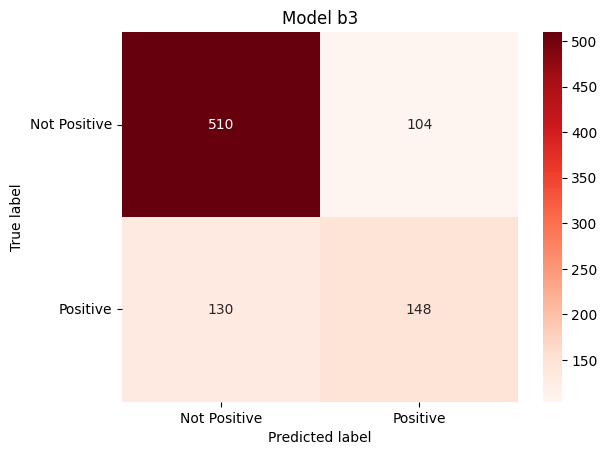

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       614
           1       0.59      0.53      0.56       278

    accuracy                           0.74       892
   macro avg       0.69      0.68      0.69       892
weighted avg       0.73      0.74      0.73       892



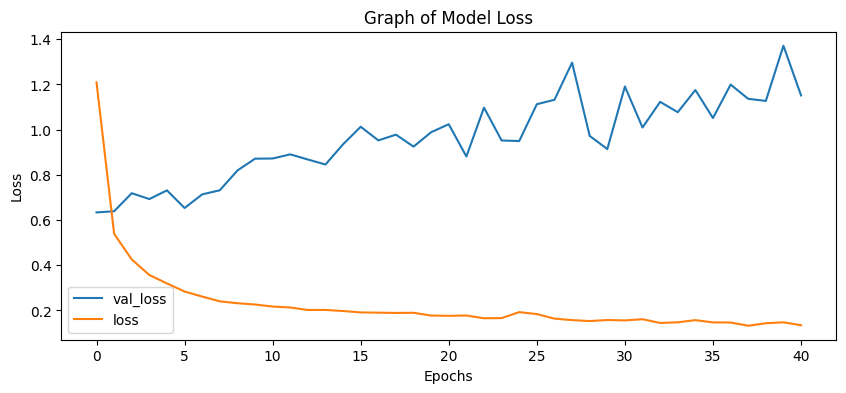

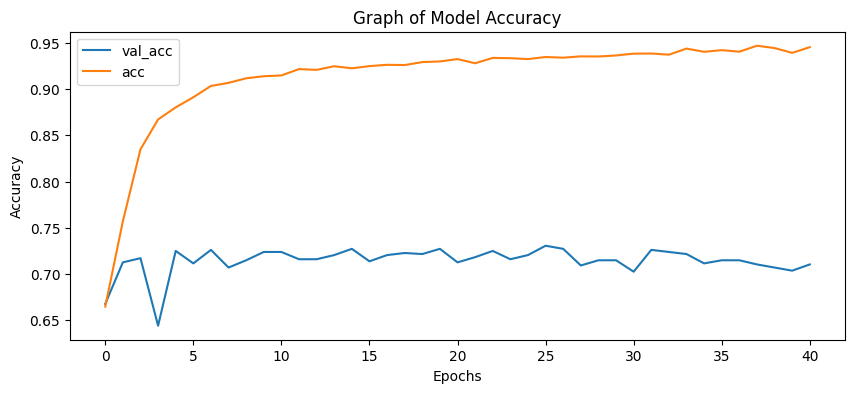

In [189]:
make_confusion_and_classification(model_b3, 'Model b3')
visualize_model_performance(model_b3_results)

## Model B3 Analysis

With the addition of L2 regularization as well as an additional dropout layer the model remains overfit but has decreased in how overfit it is as the training accuracy is ~95% now and the testing is ~74% which is a slight improvement from model B2 which had ~97% training accuracy. As there was some positive effect when adding the L2 regularizer, the regularizer will be increased from 0.02 to 0.03.

## Model B4 - Increasing L2 Regularizer 

In [207]:
model_b4 = Sequential()

model_b4.add(Embedding(input_dim = lexicon_length, output_dim = 128, input_length = 24))
model_b4.add(LSTM(128, return_sequences = True,kernel_regularizer=regularizers.l2(0.03)))
model_b4.add(GlobalMaxPool1D())
model_b4.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
model_b4.add(Dropout(0.1))
model_b4.add(Dense(16, activation='relu'))
model_b4.add(Dropout(0.1))
model_b4.add(Dense(2, activation='softmax'))


model_b4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_b4.summary()

model_b4_results = model_b4.fit(X_train, y_train, epochs=100, batch_size=20,
                    validation_data=(X_val, y_val), verbose = 1,
                   callbacks=early_stop)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 24, 128)           1133184   
                                                                 
 lstm_21 (LSTM)              (None, 24, 128)           131584    
                                                                 
 global_max_pooling1d_21 (G  (None, 128)               0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_101 (Dense)           (None, 64)                8256      
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                                 
 dense_102 (Dense)           (None, 16)                1040      
                                                     

The Accuracy for the training group was 93.36698651313782
The Loss for the training group was 0.16678684949874878
--------------------------------------
The Accuracy for the test group was 74.66367483139038
The Loss for the test group was 0.8342161774635315
28/28 [==============================] - 0s 4ms/step


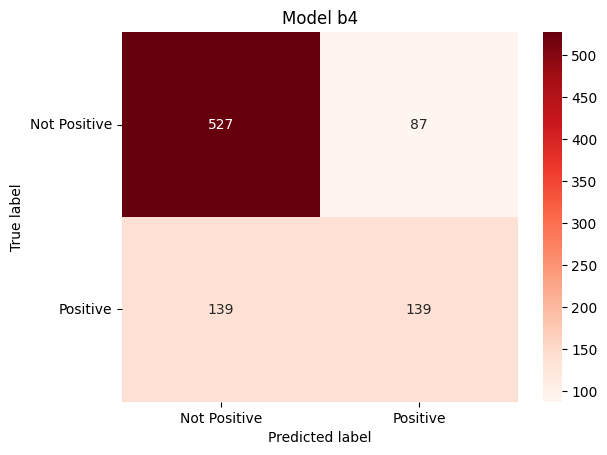

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       614
           1       0.62      0.50      0.55       278

    accuracy                           0.75       892
   macro avg       0.70      0.68      0.69       892
weighted avg       0.74      0.75      0.74       892



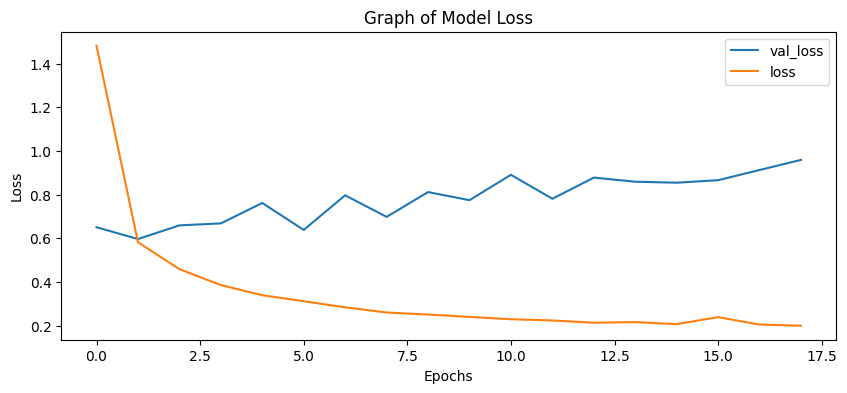

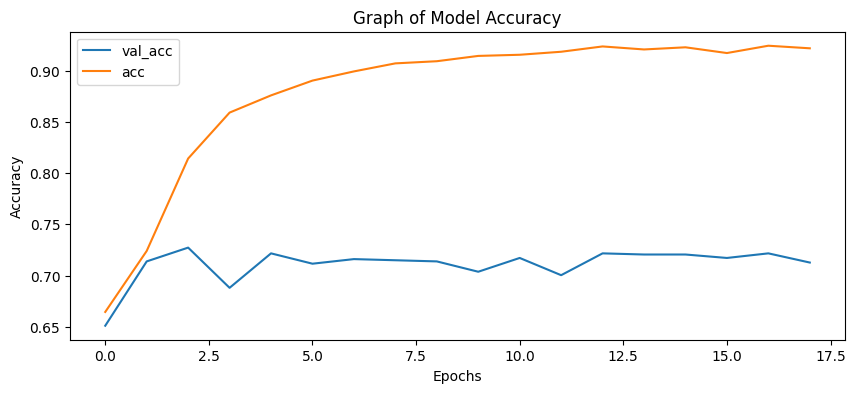

In [208]:
make_confusion_and_classification(model_b4, 'Model b4')
visualize_model_performance(model_b4_results)

## Model B4 Analysis

Model B4 is the best performing model so far, it is less overfit at accuracies of ~93% and ~75% for the training and test sets and low loss metrics at .17 and .83 respectively. Based on the graphs for loss and accuaracy this model's final epoch is not its best performing epoch. The model was programmed to save the best performing epoch in its own file, therefore the best epoch of the best performing model will be loaded and used as the final model.

## Extracting Best Epoch from Best Model as Final Model
While the model was training through the epoch's the best performing epoch in terms of validation accuracy was saved under the name "best_model.h5". This "best model" will be loaded and used as the final model for this project.

In [211]:
# Load the best (saved) model
from keras.models import load_model
saved_model = load_model('best_model.h5')


In [212]:
results_train = saved_model.evaluate(X_train, y_train)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

print('----------')

results_test = saved_model.evaluate(X_test, y_test)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

223/223 [==============================] - 1s 5ms/step - loss: 0.3124 - accuracy: 0.8954
Training Loss: 0.312 
Training Accuracy: 0.895
----------
28/28 [==============================] - 0s 4ms/step - loss: 0.6331 - accuracy: 0.7623
Test Loss: 0.633 
Test Accuracy: 0.762


The Accuracy for the training group was 89.53863382339478
The Loss for the training group was 0.31242895126342773
--------------------------------------
The Accuracy for the test group was 76.23318433761597
The Loss for the test group was 0.6330606341362
28/28 [==============================] - 0s 4ms/step


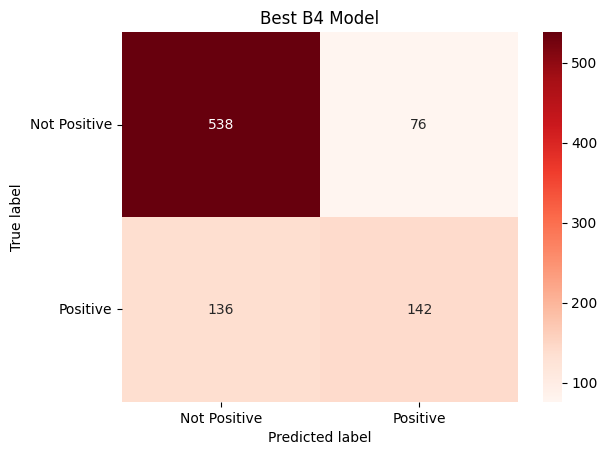

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       614
           1       0.65      0.51      0.57       278

    accuracy                           0.76       892
   macro avg       0.72      0.69      0.70       892
weighted avg       0.75      0.76      0.75       892



In [213]:
make_confusion_and_classification(saved_model, 'Best B4 Model')

## Calculating and adding a class weights metric

While there is now  a "final model" there is one last thing to investigate. The training sample for this model has unbalanced classes at a ratio of about 2:1, "Not Positive" to "Positive", normally a balance of this ratio will not make a huge difference but in order to be sure, the weight of each class will be calculated and then used as a hyperparameter when fitting the model.


### Determining Class weights

In [214]:
#Calculation Class weights 

#Total number of samples
n_samples = len(df_model)
#Total number of classification labels
n_classes = 2
#Calculating total number of positve and not positive samlpes
n_sample_pos = len(df_model[df_model['Sentiment'] == 'Positive'])
n_sample_not_pos = len(df_model[df_model['Sentiment'] == 'Not Positive'])

#Dividing to find weights for each class
class_weight_pos = n_samples / (n_classes * n_sample_pos)
class_weight_not_pos = n_samples / (n_classes * n_sample_not_pos)

class_weights = {1: class_weight_not_pos,
                0: class_weight_pos}

class_weights

{1: 0.7498317631224765, 0: 1.5006734006734006}

## Model B4_2 - Adding Class weights

In [217]:
model_b4_2 = Sequential()

model_b4_2.add(Embedding(input_dim = lexicon_length, output_dim = 128, input_length = 24))
model_b4_2.add(LSTM(128, return_sequences = True,kernel_regularizer=regularizers.l2(0.03)))
model_b4_2.add(GlobalMaxPool1D())
model_b4_2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
model_b4_2.add(Dropout(0.1))
model_b4_2.add(Dense(16, activation='relu'))
model_b4_2.add(Dropout(0.1))
model_b4_2.add(Dense(2, activation='softmax'))


model_b4_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_b4_2.summary()

model_b4_2_results = model_b4_2.fit(X_train, y_train, epochs=100, batch_size=20,
                    validation_data=(X_val, y_val), verbose = 1,
                   callbacks=early_stop, class_weight=class_weights)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 24, 128)           1133184   
                                                                 
 lstm_24 (LSTM)              (None, 24, 128)           131584    
                                                                 
 global_max_pooling1d_24 (G  (None, 128)               0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_110 (Dense)           (None, 64)                8256      
                                                                 
 dropout_46 (Dropout)        (None, 64)                0         
                                                                 
 dense_111 (Dense)           (None, 16)                1040      
                                                     

The Accuracy for the training group was 92.30121970176697
The Loss for the training group was 0.19513735175132751
--------------------------------------
The Accuracy for the test group was 74.32735562324524
The Loss for the test group was 0.8999379873275757
28/28 [==============================] - 0s 4ms/step


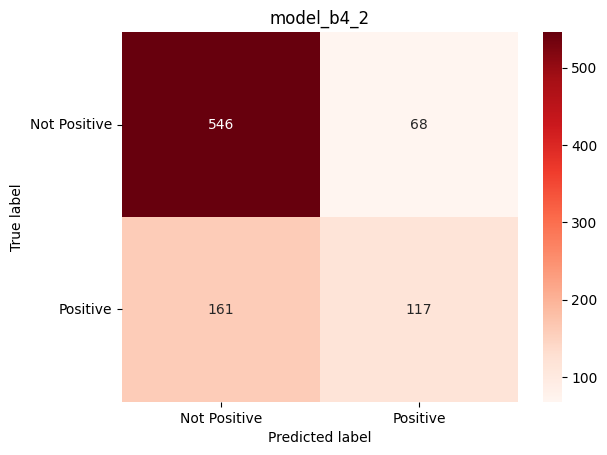

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       614
           1       0.63      0.42      0.51       278

    accuracy                           0.74       892
   macro avg       0.70      0.66      0.67       892
weighted avg       0.73      0.74      0.73       892



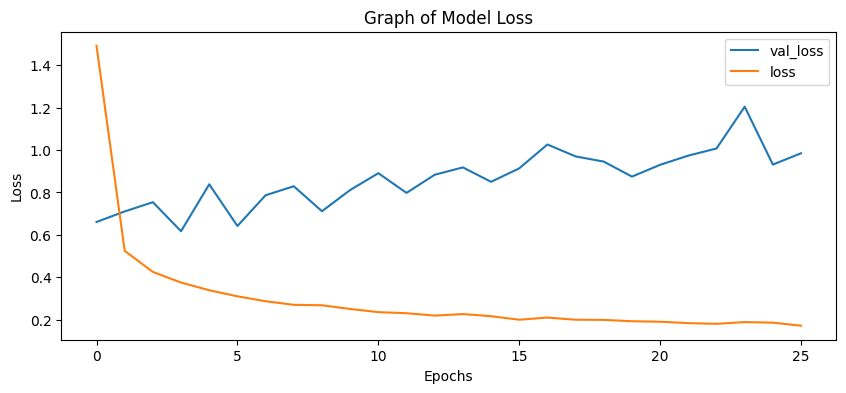

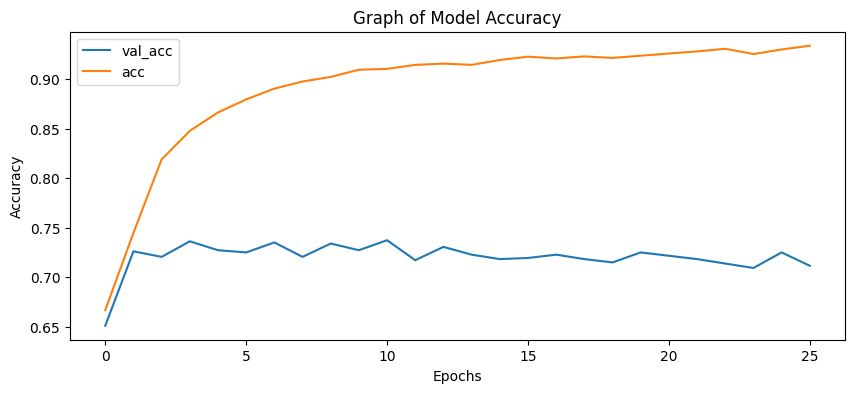

In [218]:
make_confusion_and_classification(model_b4_2, 'model_b4_2')
visualize_model_performance(model_b4_2_results)

## Model B4_2

Adding the class weights did not change the model in any significant positive way. Currently the best iteration of the model is Model B4, with the best epoch of that model being saved under the label "saved_model". This best version of the model will be named the final model and then subsequently be used to help make determinations and possible action steps for the stakeholders in regards to the current business problem.

# Final Model  

At this point multiple iterations of two different model schemes have been built out and worked through, from here the best performing model has been chosen and will now be mined for its uses in fulfilling the purposes of this project

In [222]:
#Final Model Summary
final_model = saved_model

final_model = Sequential()

final_model.add(Embedding(input_dim = lexicon_length, output_dim = 128, input_length = 24))
final_model.add(LSTM(128, return_sequences = True,kernel_regularizer=regularizers.l2(0.03)))
final_model.add(GlobalMaxPool1D())
final_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
final_model.add(Dropout(0.1))
final_model.add(Dense(16, activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(2, activation='softmax'))


final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

final_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 24, 128)           1133184   
                                                                 
 lstm_16 (LSTM)              (None, 24, 128)           131584    
                                                                 
 global_max_pooling1d_16 (G  (None, 128)               0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_86 (Dense)            (None, 64)                8256      
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_87 (Dense)            (None, 16)                1040      
                                                     

The final model for this project is a Sequential Binary Classification NLP Convolutional Neural Network that made use of Embedding, LSTM, Global Max Pooling as well as three dense layers of varying size and two dropout layers. 

L2 regularization was used on the LSTM and first dense layer to limit overfitting as well as dropout layers on the first and second dense layers.

The final Dense nodes activation was softmax and the adam optimizer was used with categorical crossentropy as the loss metric. The best model was chosen based off of the validation set's accuracy,  which the performance of was then confirmed by running the model on a separate testing set.

An examination of the performance of the model can be seen below.

## Final Model's Performance


The Accuracy for the training group was 89.53863382339478
The Loss for the training group was 0.31242895126342773
--------------------------------------
The Accuracy for the test group was 76.23318433761597
The Loss for the test group was 0.6330606341362
28/28 [==============================] - 0s 4ms/step


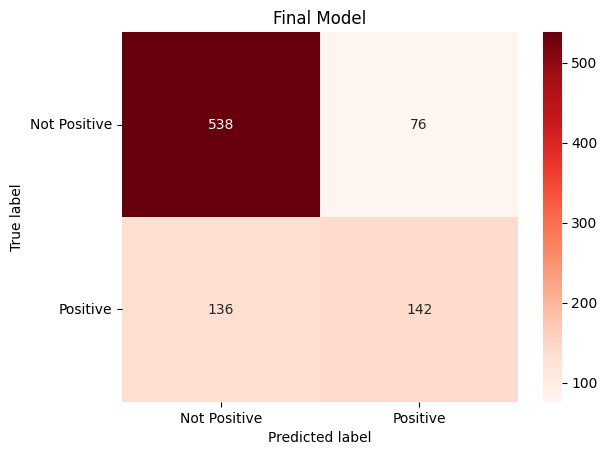

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       614
           1       0.65      0.51      0.57       278

    accuracy                           0.76       892
   macro avg       0.72      0.69      0.70       892
weighted avg       0.75      0.76      0.75       892



In [225]:
#Final Model's Classification Performance
make_confusion_and_classification(final_model, 'Final Model Confusion Matrix')


The Final Model of this project was trained and validated via a training and validation set of data. The model was then giving a novel testing set of data to evaluate its performance, the results of that test can be seen above.

The overall accuracy of the model was rated at 76% correct with the model performing better on predicting "Not Positive" labels, with an F1 score of 0.84, while the "Positive" predictions only had a 0.57 F1 score. The model had a better precision and recall score for "Not Positive" predictions  While these scores leave some room for improvement, the model performed at a level that can easily provide useful information to interested stakeholders.

The final model had very little loss with the training loss being 0.3 and the test group's loss only at 0.6. There is still room to improve this model in multiple different ways but for the scope of the current project the final model is in an acceptable form.


### Speculative Model Improvements

The current form of the final model can provide a wide range of useful information to Apple or Google but this model is not perfect. While the scope of this current project is limited due to time and resource constraints it is very likely that this model could be improved by following one or multiple of the following suggestions:

> 1. Completeing a Gridsearch to obtain the best possible hyperparameters for the current model design.

>2. The classes were unbalanced at a ratio of 2:1, it is likely that balancing these classes prior to modeling rather than using class_weights during modeling would create different results

>3. Obtaining more labled tweet data to use for training the model

>4. Using additional normalization and regularization techniques within the model to deal with overfitting 

>5. Engineering additional data features to help with classification
    

## Model Use Examples

Below is an example of how the model may be used, a series of tweets are input and their sentiment is predicted.

In [244]:
# A few example Tweets
test_tweets = ["I love Oranges!",
               "I did not like this",
               "My favorite color is green"]

#Tokenizing and padding example tweets
sequences = tokenizer.texts_to_sequences(test_tweets)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#Getting final model predictions
input_prediction = final_model.predict(padded)
input_pred_label = np.argmax(input_prediction, axis=1)
print(input_pred_label)
#Reading tweets predicted classification
for i in range(len(test_tweets)):
    if input_pred_label[i] == 1:
        print(f"The Tweet [{test_tweets[i]}] is Positve")
    elif input_pred_label[i] == 0:
        print(f"The Tweet [{test_tweets[i]}] is Not Positive")
        
        

1/1 [==============================] - 0s 14ms/step
[1 0 0]
The Tweet [I love Oranges!] is Positve
The Tweet [I did not like this] is Not Positive
The Tweet [My favorite color is green] is Not Positive


Once the tweets have been labeled, a large variety of options opens up for how one may like to analyze the tweets within the dataset. For example, as seen during the EDA steps of this project n-gram detectors can be built out to elicidate the most common phrases assocaited with a certain subset of tweets or hashtags can be pulled to discover underlying communities and trends that may be within the target demographic.


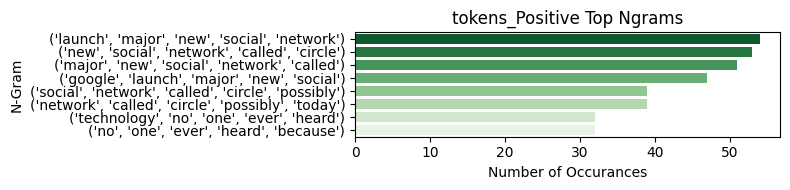

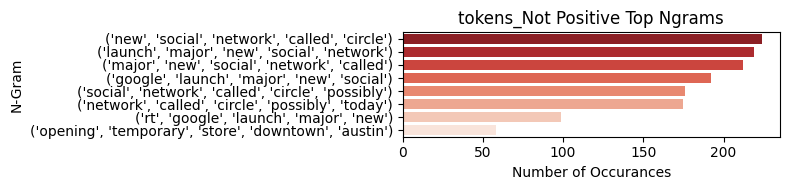

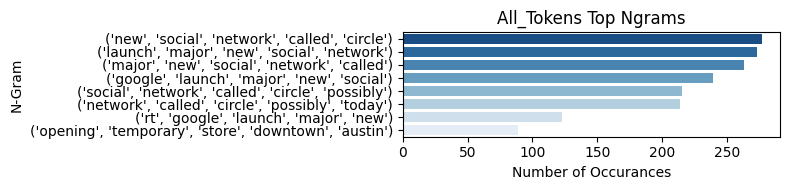

In [245]:
#Example of top Phrases by sentiment
top_ngrams_bars(5, tokens_list)

The top phrases found through an N-Gram analysis may ellucidate common thought trends in the consumerbase allowing for direct actions to be made based off of these common opinions.

Top Ten Hashtags for Positive are: [('sxsw', 2984), ('apple', 177), ('ipad2', 130), ('sxswi', 96), ('ipad', 93), ('iphone', 82), ('google', 69), ('android', 42), ('austin', 40), ('tech', 28), ('hollergram', 23), ('ubersocial', 21), ('tapworthy', 21), ('winning', 19), ('circles', 17)]


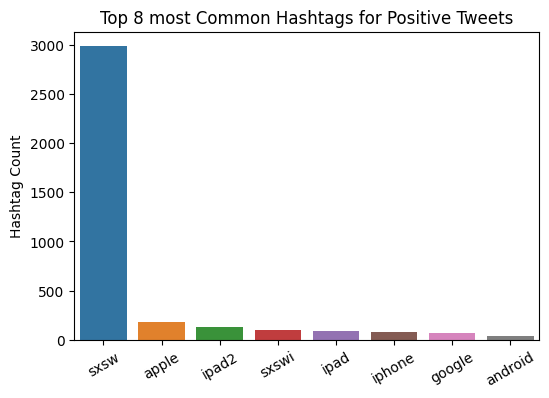

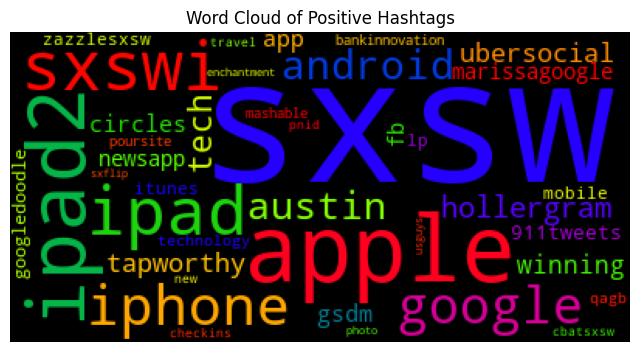

In [246]:
#Example of top hashtags used by sentiment

hashtag_wordcloud_bar(df, 'Positive')

# Conclusion

The present Positive Tweet Sentiment CNN NLP binary classifaction model performs fairly well with an overall accuracy of 76%, while there is room to improve the model the true power of comes from the various ways labeled tweets can be used to extract business insights regarding a brand or a specific product.

With the ability to identify and sort out positive sentiment text strings from social media or other sources, the users who sent them can often be identified allowing for a company to better understand and target their consumerbase.